In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data loading and Cleaning

Next we will load the loan csv and then do the following

1) find out which all columns are having null/NaN values, find all these columns and drop them as they dont give any inputs.

2) use the null value dataframe to find which columns are null and filter out them from main data.

In [2]:
loan_data = pd.read_csv('./loan.csv',low_memory=False)
print('size of data with id as unique column {}'.format(loan_data.id.count()))

# print(loan_data.isnull().sum()/len(loan_data.index))
nullSeries = loan_data.isnull().sum()/len(loan_data.index)
null_data = pd.DataFrame(nullSeries,columns=['nullindex'])
nonNullCol = list(null_data.loc[null_data.nullindex!=1.0].index)
loan_data = loan_data[nonNullCol]

print(loan_data.shape)
loan_data.head()

size of data with id as unique column 39717
(39717, 57)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [3]:
d = pd.DataFrame(loan_data.isnull().sum()/len(loan_data.index),columns=['nullper'])
d = d.loc[d.nullper > 0]

e = pd.DataFrame(loan_data[loan_data.loan_status == 'Charged Off'].isnull().sum()/len(loan_data[loan_data.loan_status == 'Charged Off'].index),columns=['co_nullper'])
e = e.loc[e.co_nullper > 0]

pd.concat([d,e],axis=1)

,nullper,co_nullper
emp_title,0.061913,0.086014
emp_length,0.027066,0.040519
desc,0.325805,0.320242
title,0.000277,0.000355
mths_since_last_delinq,0.646625,0.619335
mths_since_last_record,0.929854,0.897281
revol_util,0.001259,0.002843
last_pymnt_d,0.001788,0.012618
next_pymnt_d,0.971297,1.000000
last_credit_pull_d,0.000050,0.000178


Now we will start data cleaning column wise and since the below columns have large % of null values.

1) 'mths_since_last_record' --> 92% null values,

2) 'next_pymnt_d' --> 97% null values


variables with less business significance
3) member_id --> because its a random number and we already have id as unique key. No inputs for making Charged off decisions

4) funded_amnt_inv --> The loan is funded, and investers are not going to get money back :)

5) sub_grade --> redundant information with grade column

6) issue_d --> the loan is already funded 

7) zip_code --> Unable to process the data to a meaning form as it requires lot of patience. 

8) out_prncp --> It kind of gives information  to current loan rather than charged off cases. 

9) out_prncp_inv --> It kind of gives information  to current loan rather than charged off cases. 

10) total_pymnt_inv --> redundant columns WRT to total_pymnt

11) total_rec_prncp, total_rec_int --> It kind of gives information  to current loan rather than charged off cases. 

replace the text columns with some knows strings instead of dropping the rows for it. then for the remaining columns which have null values we can drop the corresponding rows.

In [4]:
loan_data = loan_data.drop(['mths_since_last_record','next_pymnt_d','member_id','funded_amnt_inv','sub_grade'\
                           ,'issue_d','zip_code','out_prncp','out_prncp_inv','total_pymnt_inv','total_rec_prncp'\
                            , 'total_rec_int' ], axis=1)

Analysis to check for mths_since_last_delinq releaved that for the column the nulls values are for cases charged off, hence replacing that column with std or median should be fine. Prefering std value so that we dont put too much penalty on the 4% null values which are in non-default cases.

count    2142.000000
mean       36.157330
std        22.679333
min         0.000000
10%         7.000000
25%        17.000000
50%        34.000000
75%        53.000000
90%        71.000000
95%        76.000000
97%        78.770000
99%        81.000000
max       107.000000
Name: mths_since_last_delinq, dtype: float64
0
89.0


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


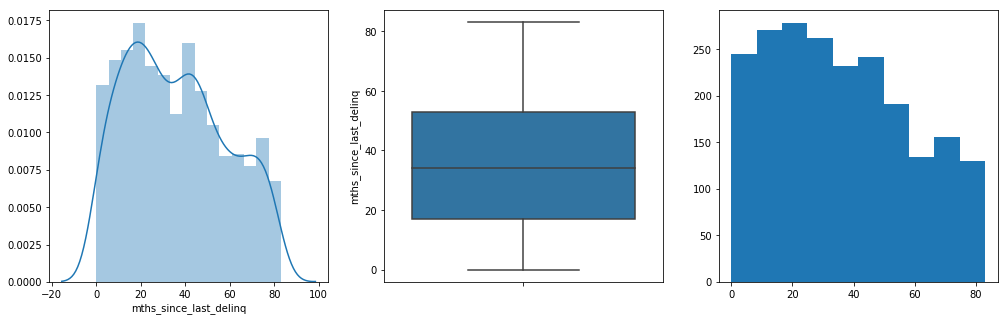

count    2140.000000
mean       36.095794
std        22.599832
min         0.000000
10%         7.000000
25%        17.000000
50%        34.000000
75%        53.000000
90%        70.100000
95%        76.000000
97%        78.000000
99%        81.000000
max        83.000000
Name: mths_since_last_delinq, dtype: float64

In [5]:
a = loan_data[loan_data.loan_status == 'Charged Off'].mths_since_last_delinq.dropna()
print(a.describe([0.1,0.25,0.75,0.9,0.95,0.97,0.99]))

## identify lower and upper bound and remove outliers
IQR = a.quantile(0.75) - a.quantile(0.25)
step = 1.0 * IQR
lowerbound = 0 if (a.quantile(0.25) - step) < 0 else (a.quantile(0.25) - step)
upperbound = a.quantile(0.75) + step
print(lowerbound)
print(upperbound)

a = a[a < upperbound]
plt.figure(figsize=(17,5))
plt.subplot(131)
sns.distplot(a)
plt.subplot(132)
sns.boxplot(y = a)
plt.subplot(133)
plt.hist(a)
#plt.yscale('log')
plt.show()

a.describe([0.1,0.25,0.75,0.9,0.95,0.97,0.99])

Now we will start conditioning/value treatments for the respective columns after looking sample data from each column, like remove the % from float percent values, impute values
And specifically for empoyee experience convert the categories into 10 buckets

In [6]:
loan_data.mths_since_last_delinq.fillna(22.5,inplace=True)
loan_data.emp_title.fillna('unknown_emp_title', inplace=True)
loan_data.desc.fillna('unknow_desc',inplace=True)
loan_data.title.fillna('unknow_title',inplace=True)


In [7]:
type(loan_data['emp_length'][0])

str

In [8]:
loan_data["emp_length"] = loan_data["emp_length"].astype(str)
# treating   emp_length as categorical by converting to nominal variable
loan_data["emp_length"] = loan_data["emp_length"].apply(lambda x: '0' if (x == 'n/a' or x == '< 1 year') else x)
loan_data["emp_length"] = loan_data["emp_length"].apply(lambda x: x.replace("years", "").replace("year", "").replace("+","").replace(">","").strip())


print('rows having number of null values {}'.format(set(loan_data.isnull().sum(axis=1))))
print('columns having number of null values {}'.format(set(loan_data.isnull().sum())))
loan_data = loan_data.dropna()

print(loan_data.shape)
d = pd.DataFrame(loan_data.isnull().sum()/len(loan_data.index),columns=['nullper'])
d = d.loc[d.nullper > 0]

e = pd.DataFrame(loan_data[loan_data.loan_status == 'Charged Off'].isnull().sum()/len(loan_data[loan_data.loan_status == 'Charged Off'].index),columns=['co_nullper'])
e = e.loc[e.co_nullper > 0]

pd.concat([d,e],axis=1)

rows having number of null values {0, 1, 2, 3, 4}
columns having number of null values {0, 2, 71, 39, 50, 56, 697}
(38900, 45)


,nullper,co_nullper


In [9]:
#uncomment this code to see sample value for each column.
# cols = loan_data.columns.values
# for colName in cols:
#     print(loan_data[colName].head(2))
    
loan_data['term'] = loan_data.term.apply(lambda x: int(x[0:3]))
loan_data['int_rate'] = loan_data.int_rate.apply(lambda x: float(x.strip('%')))
loan_data['revol_util'] = loan_data.revol_util.apply(lambda x: float(x.strip('%')))

print(loan_data.shape)
loan_data.head()

(38900, 45)


,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,36,10.65,162.87,B,unknown_emp_title,10,RENT,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,2500,2500,60,15.27,59.83,C,Ryder,0,RENT,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,2400,2400,36,15.96,84.33,C,unknown_emp_title,10,RENT,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,10000,10000,36,13.49,339.31,C,AIR RESOURCES BOARD,10,RENT,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,3000,3000,60,12.69,67.79,B,University Medical Group,1,RENT,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [10]:
invSet = ["","n/a","N/A"]
cols = loan_data.columns.values
dataDict = {'int64':[],'float64':[],'object':[]}
for colName in cols:
#     print('column contain invalid values {0}:{1}'.format(colName,loan_data.loc[loan_data[colName].isin(invSet)].empty))
    dataDict[str(loan_data[colName].dtype)].append(colName)

print('probable Categorical values')
print(dataDict['object'],'\n')
print('probable Continuous values')
print(dataDict['int64'],'\n')
print(dataDict['float64'],'\n')
# loan_data.head()

probable Categorical values
['grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type'] 

probable Continuous values
['id', 'loan_amnt', 'funded_amnt', 'term', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'policy_code', 'acc_now_delinq', 'delinq_amnt'] 

['int_rate', 'installment', 'annual_inc', 'dti', 'mths_since_last_delinq', 'revol_util', 'total_pymnt', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'] 



1) Again use the categorical value first and then check if each category is a single constant value and then we can plan to exclude that as that will not give us any information

2) Build a dataframe on the univariate analysis for all the comtinuous variables, and then check if the columns is having single value like 0.0 or 0 and drop them as they dont give us information for analysis

3) Filter out the desc, url , title and emp_title as they can be considered for sentiment analysis kind of overwork here.

In [11]:
# seeing from popular categories for which we can check on the analysis.
catColList = list()
for eachCat in dataDict['object']:
    if(eachCat not in ['desc','url','title','emp_title']):
#         print('{0} : {1}'.format(eachCat,set(loan_data[eachCat].unique())))
        if(len(loan_data[eachCat].unique()) > 1):
            catColList.append(eachCat)

#TODO for each continous column create the table of description and append the values to check how the data is changing per col
quantRange = [0.1,0.25,0.75,0.9,0.95,0.97,0.99]
condf = pd.DataFrame()
for eachCol in dataDict['int64']:
    if(eachCol not in ['id','member_id']):
        a = pd.DataFrame(loan_data[[eachCol]].describe(quantRange))[1:]#excluding the count as we are aware of that metric
        condf = pd.concat([a,condf], axis=1)
        
for eachCol in dataDict['float64']:
    a = pd.DataFrame(loan_data[[eachCol]].describe(quantRange))[1:]#excluding the count as we are aware of that metric
    condf = pd.concat([a,condf], axis=1)

#for univariate analysis on which has constant value might not have any inputs to be given for EDA (but can be considered for modelling)
# print(condf.head(12))
condf.to_csv('./univariate_column_meta_data.csv')
nunique = condf.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
print('columns having unique/single value {}'.format(cols_to_drop))
condf = condf.drop(cols_to_drop, axis=1)

reqColList = list(['id']) + list(catColList) + list(condf.columns.values)
loan_data = loan_data[reqColList]
loan_data.to_csv('./loan_cleanedup.csv')
print(loan_data.columns.values)
loan_data.head()

columns having unique/single value Index(['tax_liens', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med',
       'delinq_amnt', 'acc_now_delinq'],
      dtype='object')
['id' 'grade' 'emp_length' 'home_ownership' 'verification_status'
 'loan_status' 'purpose' 'addr_state' 'earliest_cr_line' 'last_pymnt_d'
 'last_credit_pull_d' 'pub_rec_bankruptcies' 'last_pymnt_amnt'
 'collection_recovery_fee' 'recoveries' 'total_rec_late_fee' 'total_pymnt'
 'revol_util' 'mths_since_last_delinq' 'dti' 'annual_inc' 'installment'
 'int_rate' 'policy_code' 'total_acc' 'revol_bal' 'pub_rec' 'open_acc'
 'inq_last_6mths' 'delinq_2yrs' 'term' 'funded_amnt' 'loan_amnt']


,id,grade,emp_length,home_ownership,verification_status,loan_status,purpose,addr_state,earliest_cr_line,last_pymnt_d,...,policy_code,total_acc,revol_bal,pub_rec,open_acc,inq_last_6mths,delinq_2yrs,term,funded_amnt,loan_amnt
0,1077501,B,10,RENT,Verified,Fully Paid,credit_card,AZ,Jan-85,Jan-15,...,1,9,13648,0,3,1,0,36,5000,5000
1,1077430,C,0,RENT,Source Verified,Charged Off,car,GA,Apr-99,Apr-13,...,1,4,1687,0,3,5,0,60,2500,2500
2,1077175,C,10,RENT,Not Verified,Fully Paid,small_business,IL,Nov-01,Jun-14,...,1,10,2956,0,2,2,0,36,2400,2400
3,1076863,C,10,RENT,Source Verified,Fully Paid,other,CA,Feb-96,Jan-15,...,1,37,5598,0,10,1,0,36,10000,10000
4,1075358,B,1,RENT,Source Verified,Current,other,OR,Jan-96,May-16,...,1,38,27783,0,15,0,0,60,3000,3000


In [12]:
loan_data.columns

Index(['id', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'earliest_cr_line',
       'last_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies',
       'last_pymnt_amnt', 'collection_recovery_fee', 'recoveries',
       'total_rec_late_fee', 'total_pymnt', 'revol_util',
       'mths_since_last_delinq', 'dti', 'annual_inc', 'installment',
       'int_rate', 'policy_code', 'total_acc', 'revol_bal', 'pub_rec',
       'open_acc', 'inq_last_6mths', 'delinq_2yrs', 'term', 'funded_amnt',
       'loan_amnt'],
      dtype='object')

In [13]:
loan_data['loan_status'].value_counts()

Fully Paid     32336
Charged Off     5424
Current         1140
Name: loan_status, dtype: int64

## We can see that, most of the loans comprises of fully_paid status, while there is some chunk which is current running loans. We can not analyse based on current loans as they have not yet defaulted so lets get rid of them.

In [14]:
loan_data = loan_data[loan_data['loan_status'] != 'Current']

# Univariate Analysis

1) Perform the univariate (for categorical and continous) indivdual columns, like removal of outliers, finding the tuning the mean and 50th quantile difference

2) Derrive new columns as well as and when required.

In [15]:
#create some common functions for performing univariate analysis
#For funded_amount
def outlierranges(loan_data,col_name,exp):
    ## identify lower and upper bound and remove outliers
    IQR = loan_data[col_name].quantile(0.75) - loan_data[col_name].quantile(0.25)
    step = exp * IQR
    lowerbound = 0 if (loan_data[col_name].quantile(0.25) - step) < 0 else (loan_data[col_name].quantile(0.25) - step)
    upperbound = loan_data[col_name].quantile(0.75) + step
    print('lower bound ', lowerbound)
    print('upper bound ', upperbound)
    return lowerbound,upperbound

def plotContinousVar(loan_data,col_name,logScale):
    plt.figure(figsize=(20,5))
    plt.subplot(131)
    sns.distplot(loan_data[col_name])
    plt.subplot(132)
    sns.boxplot(y = loan_data[col_name])
    plt.subplot(133)
    plt.hist(loan_data[col_name])
    if(logScale == True):
        plt.yscale('log')
    plt.show()

def getDefaultPercentageDF(loan_data, column_name):
    #calculate total count per category
    count_df = loan_data[['id',each]].groupby(each, as_index=False)\
                                             .count()\
                                             .sort_values(by='id',ascending=False)
    count_df = count_df.rename(index=str,columns={'id':'total_count'})

    #calculate charged off count per category
    co_count_df = loan_data[['id','loan_status',each]].loc[loan_data.loan_status ==1]\
                                                              .groupby([each,'loan_status'],as_index=False)\
                                                              .count()
    co_count_df = co_count_df.rename(index=str,columns={'id':'co_count'})

    #merge the two categories and calculate the derived column for charged off % and see which is having high variance 
    final_df = pd.merge(count_df,co_count_df,on=each) 
    final_df['default %'] = round((final_df.co_count/final_df.total_count)*100,2)
    return count_df,final_df

In [16]:
## Lets convert loan_status to numeric field for summarization
loan_data['loan_status'] = loan_data['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
loan_data['loan_status'] = loan_data['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
loan_data['loan_status'].value_counts()

0    32336
1     5424
Name: loan_status, dtype: int64

Start Anayzing the categorical variables, but first doing a coutn plot of loans applied for each category compared to the charged off % of each category.

While analysing the categorical column, we see some categories in count plot and some categories in missing default %plot as the reason would be that they are not applicable for "charged off" cases

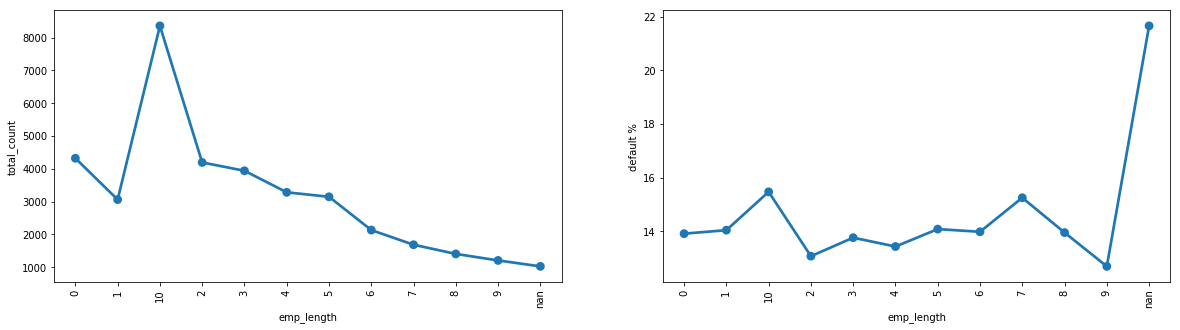

--------------------------------------------------------------------------------------------------------------------


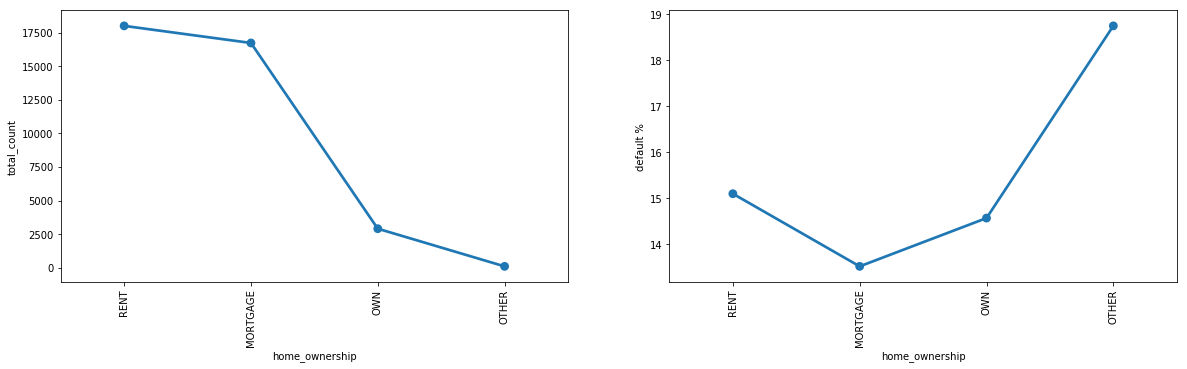

--------------------------------------------------------------------------------------------------------------------


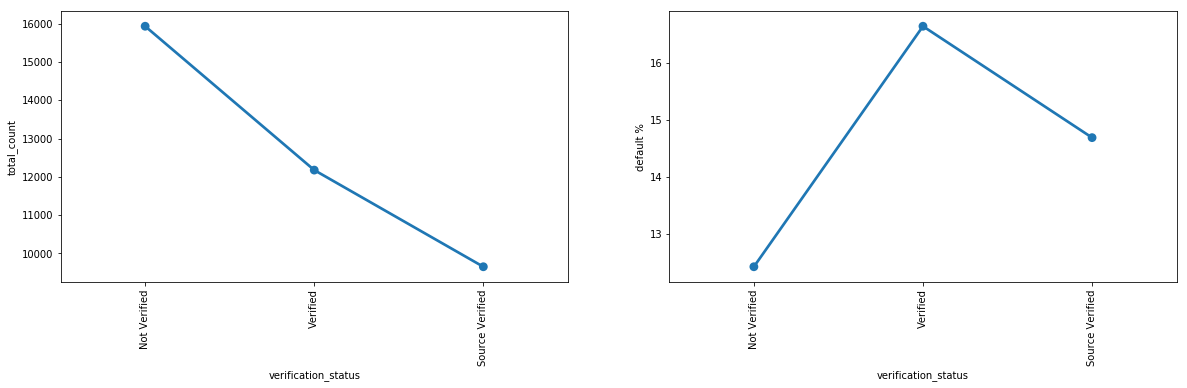

--------------------------------------------------------------------------------------------------------------------


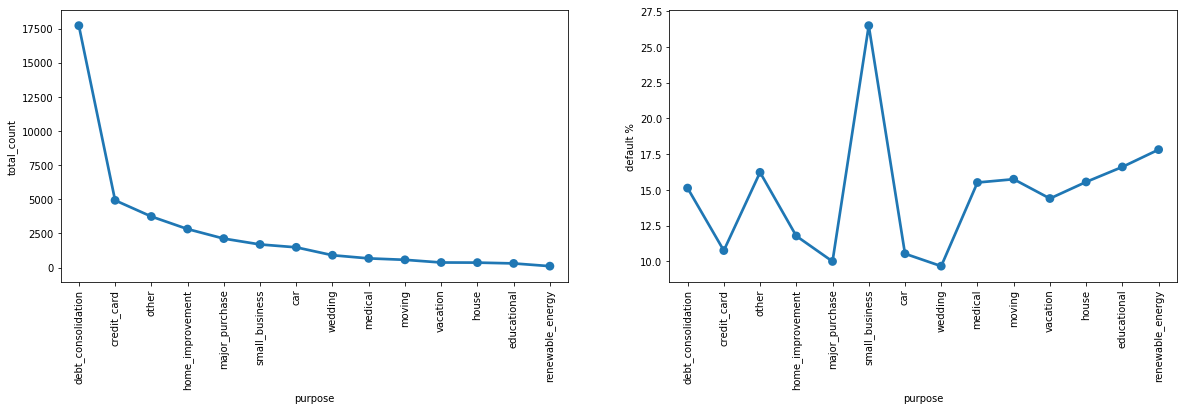

--------------------------------------------------------------------------------------------------------------------


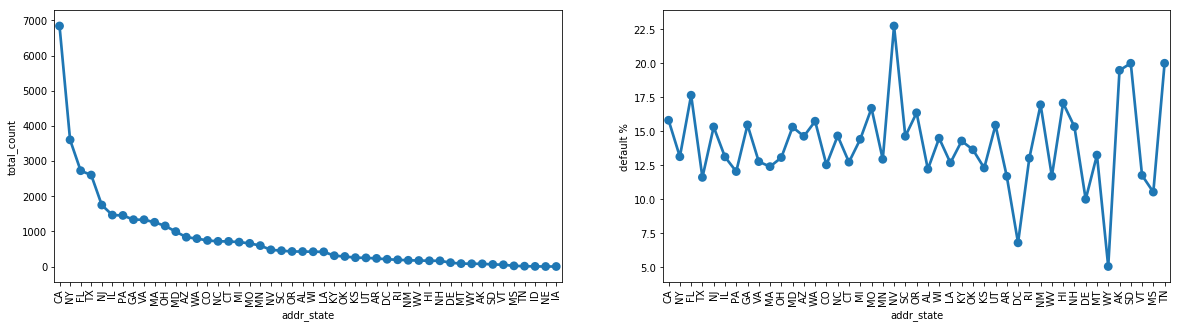

--------------------------------------------------------------------------------------------------------------------


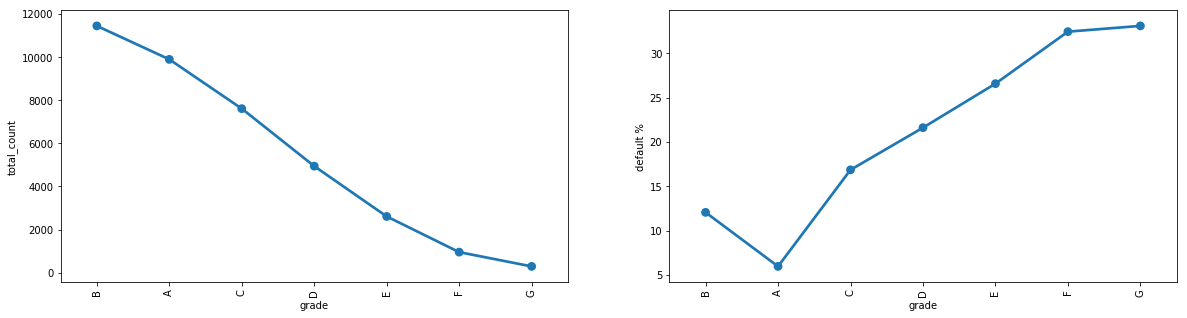

--------------------------------------------------------------------------------------------------------------------


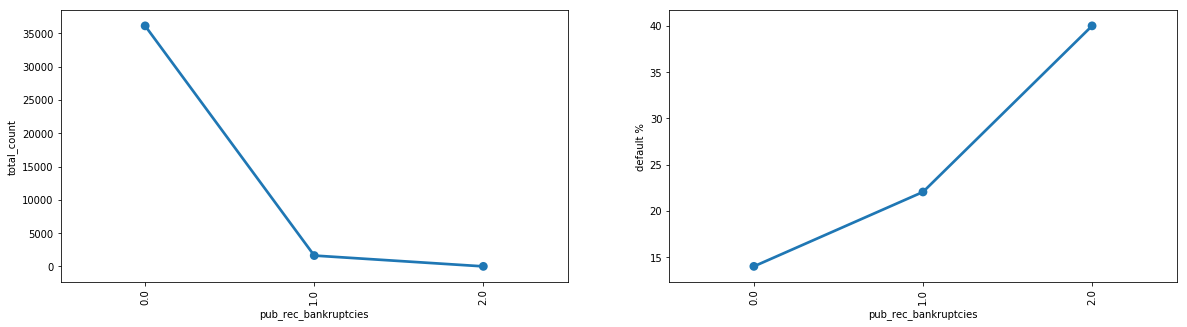

--------------------------------------------------------------------------------------------------------------------


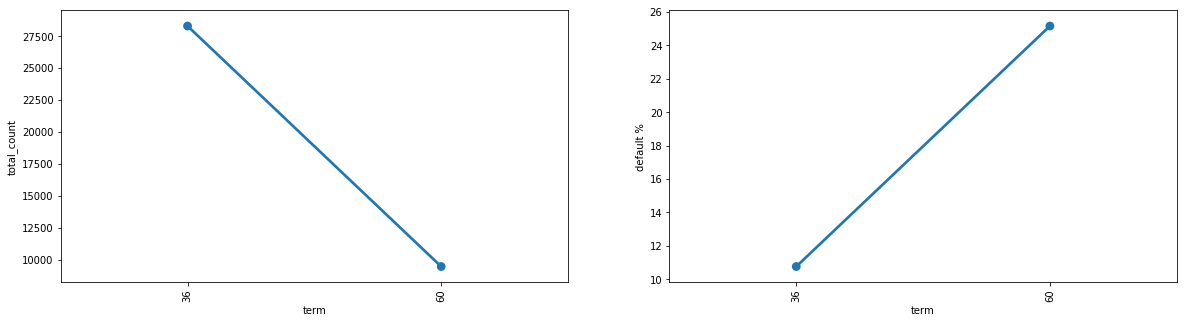

--------------------------------------------------------------------------------------------------------------------


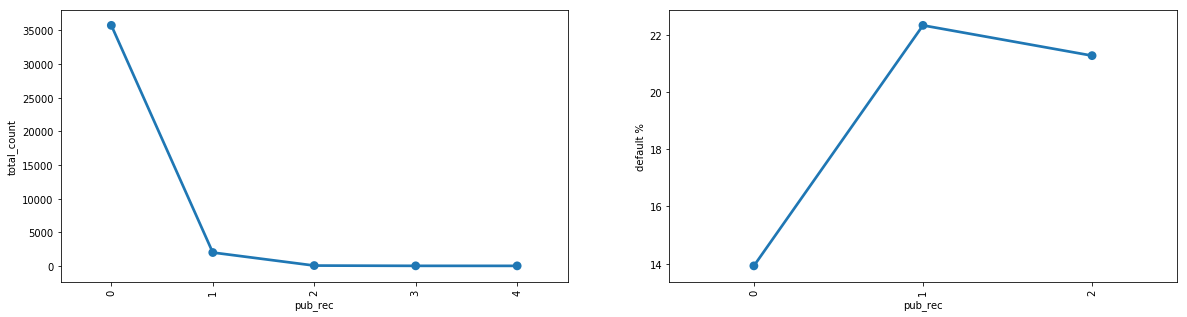

--------------------------------------------------------------------------------------------------------------------


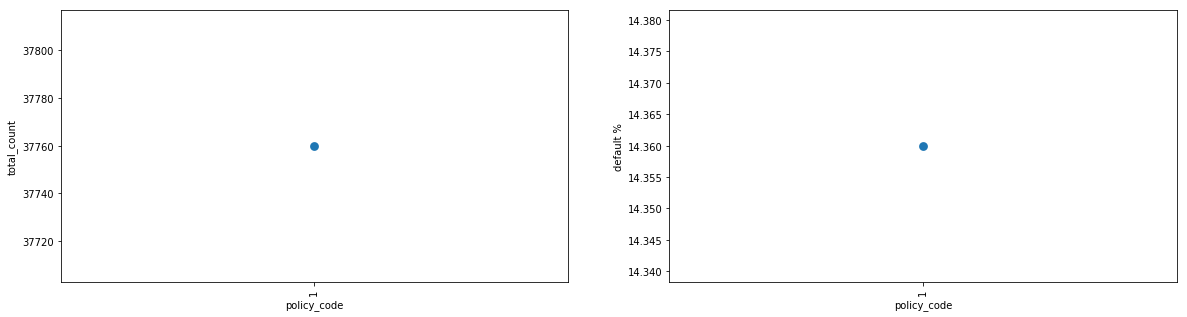

--------------------------------------------------------------------------------------------------------------------


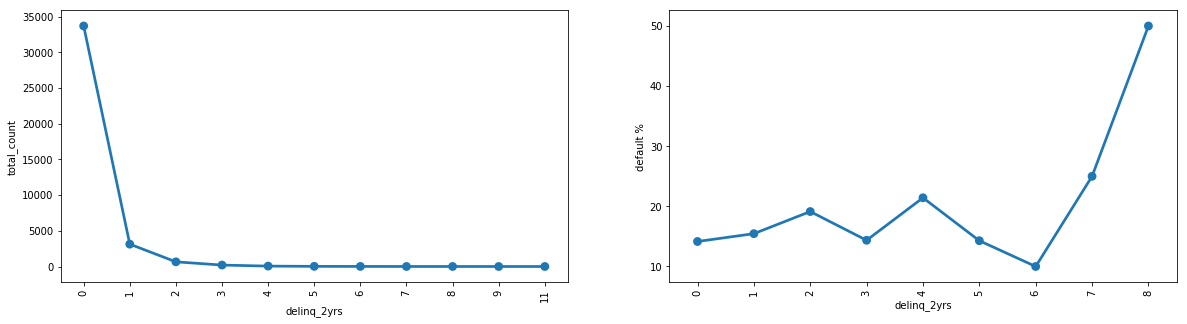

--------------------------------------------------------------------------------------------------------------------


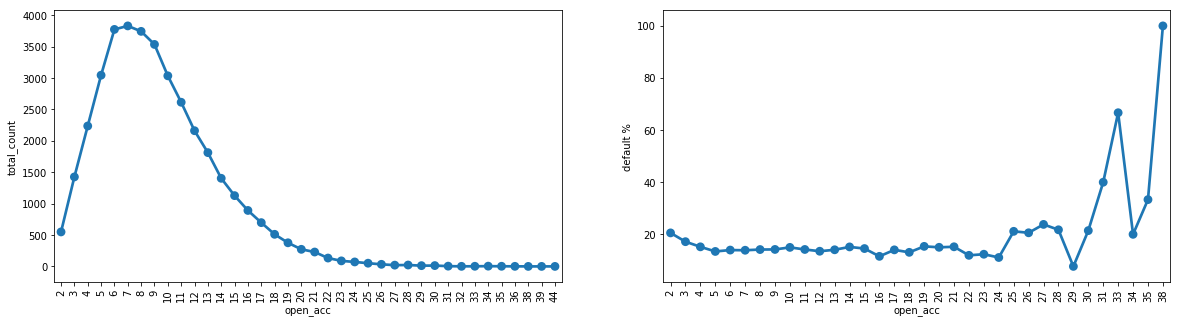

--------------------------------------------------------------------------------------------------------------------


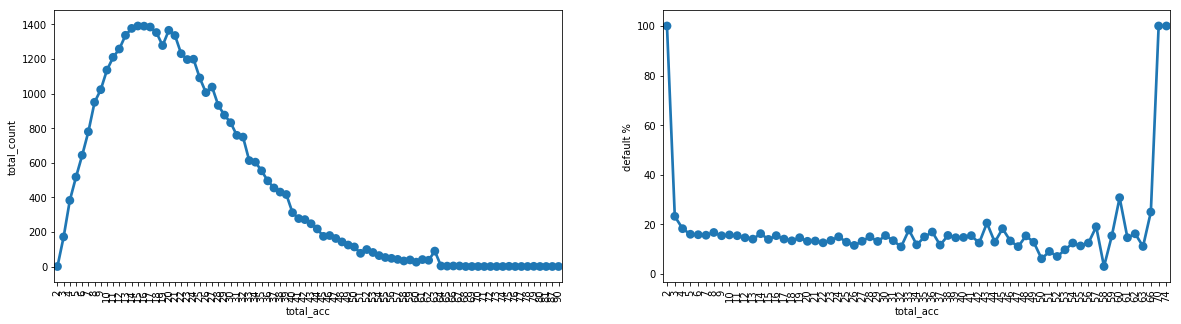

--------------------------------------------------------------------------------------------------------------------


In [17]:
cat_col_list = ['emp_length', 'home_ownership', 'verification_status', 'purpose','addr_state', 'grade',\
                'pub_rec_bankruptcies','term','pub_rec','policy_code','delinq_2yrs','open_acc','total_acc']

for each in cat_col_list:
    count_df, final_df = getDefaultPercentageDF(loan_data,each)

    #plot to understand where the maximum loans are lended/funded 
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.pointplot(x=each, y="total_count", data=count_df)
    plt.xticks(rotation=90)
    
    plt.subplot(122)
    sns.pointplot(x=each, y="default %", data=final_df)
    plt.xticks(rotation=90)
    
    plt.show()
    print('--------------------------------------------------------------------------------------------------------------------')

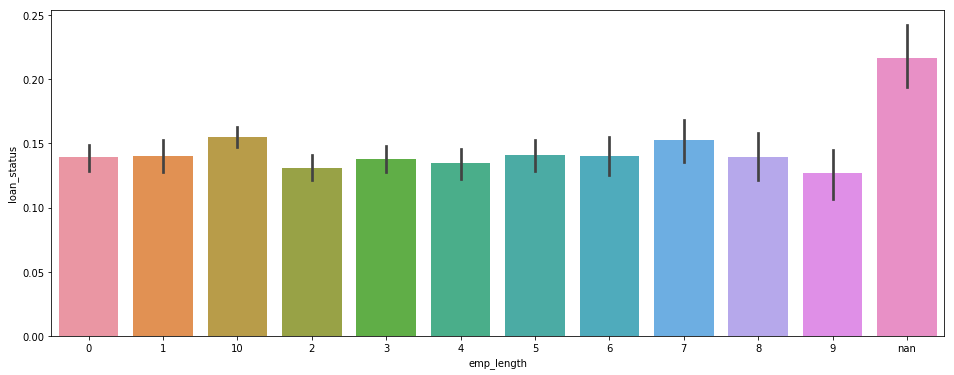

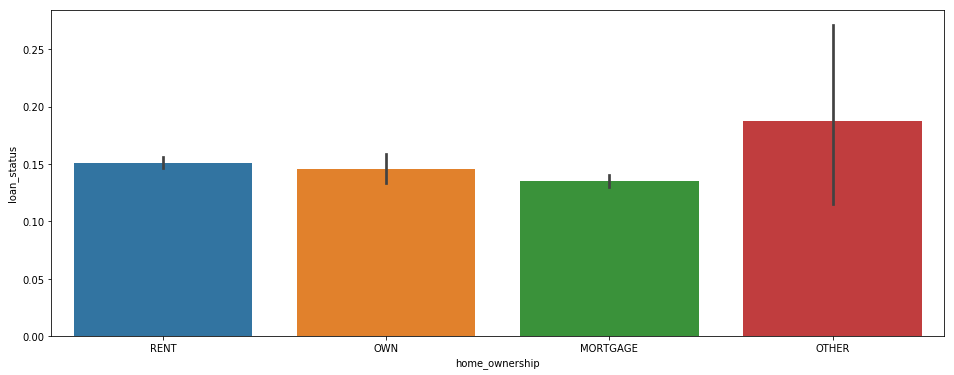

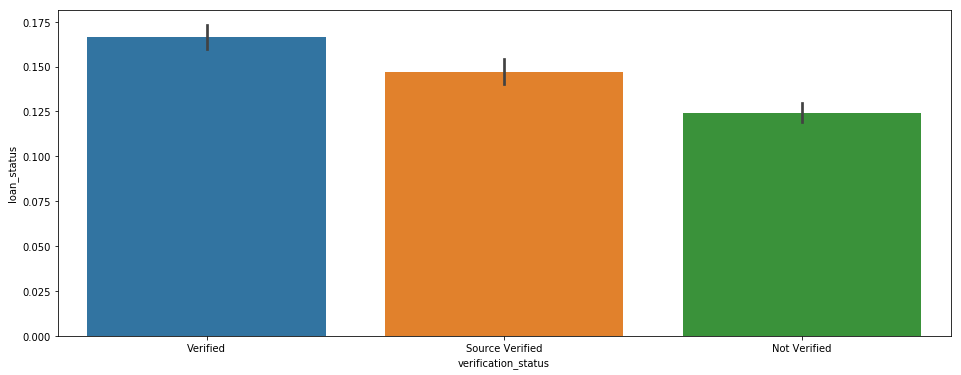

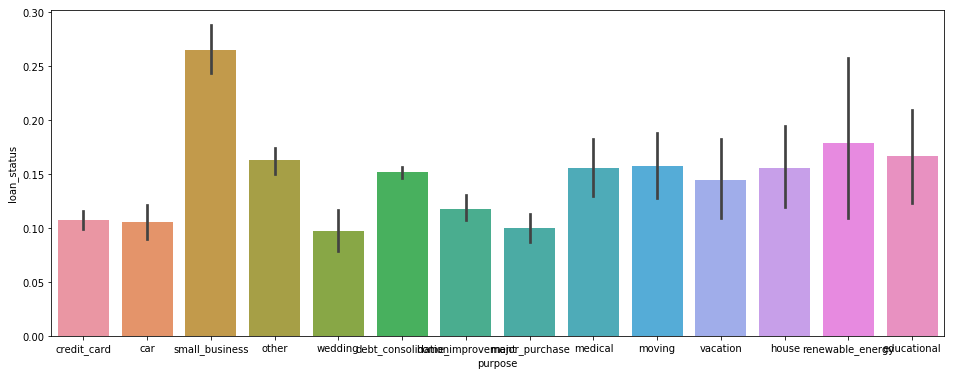

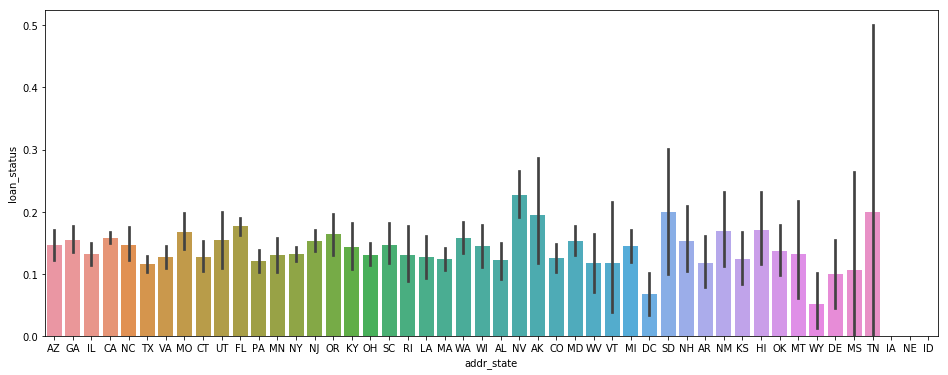

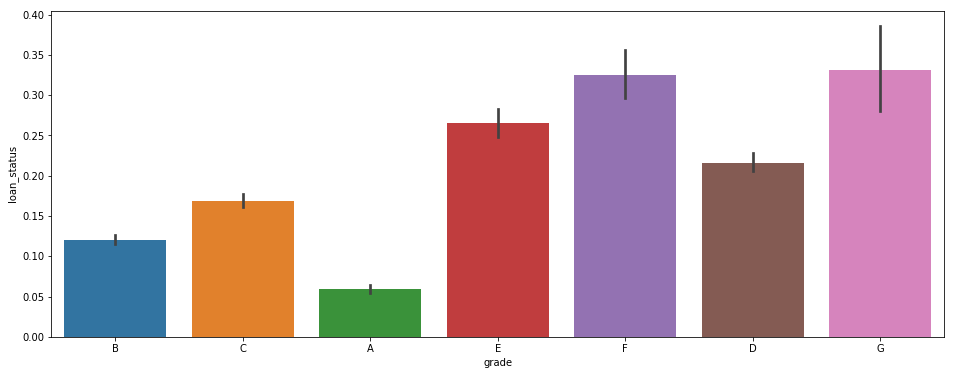

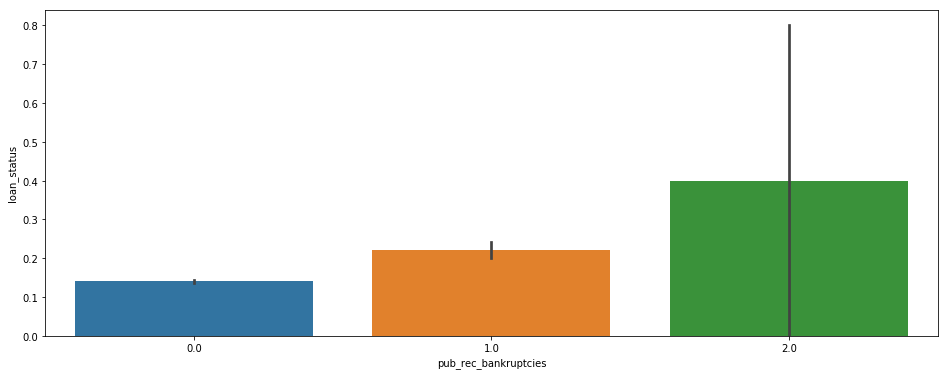

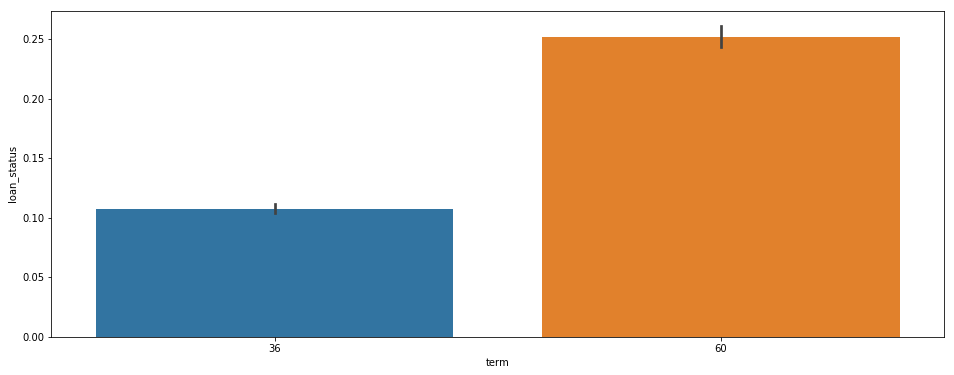

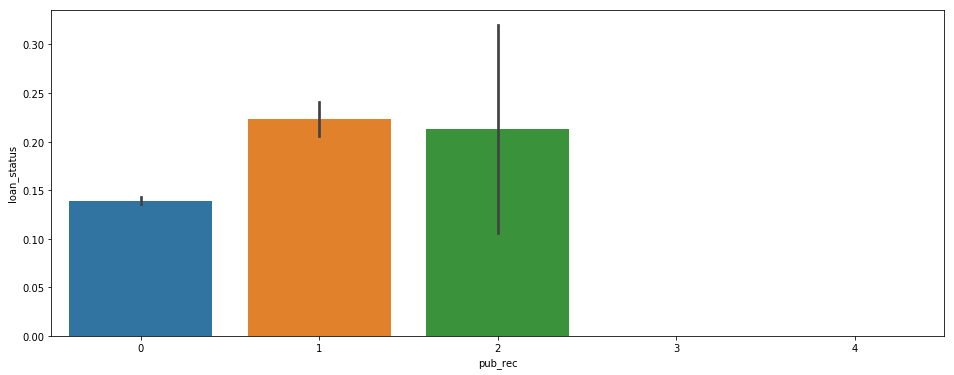

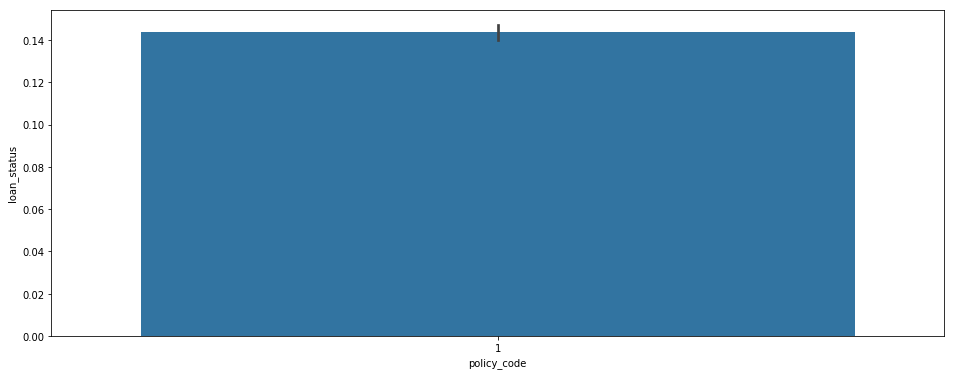

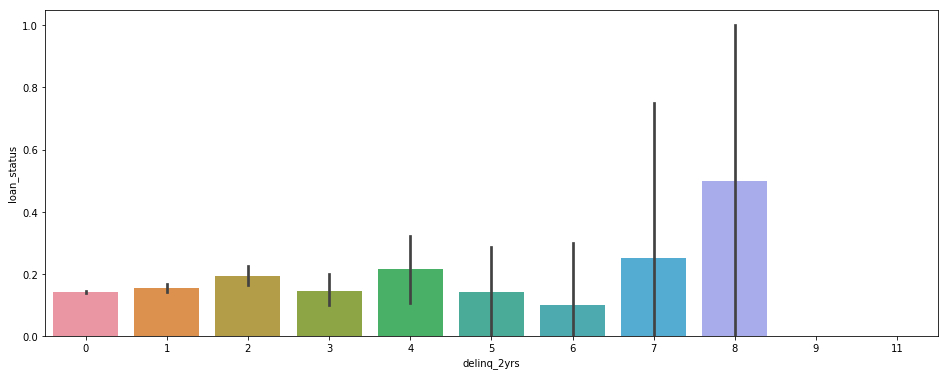

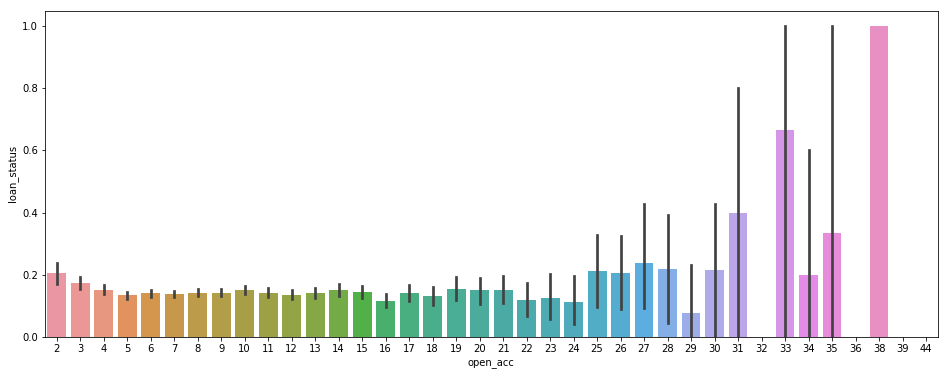

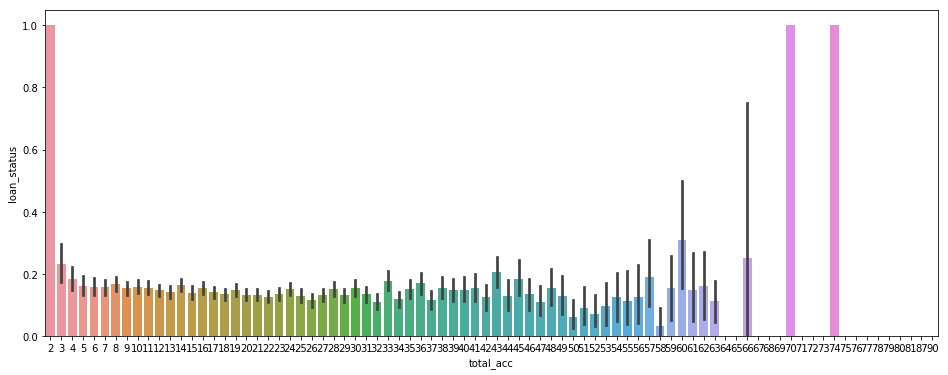

In [18]:
# Lets plot default rates across various categorical features of the loan to understand the impact

for each in cat_col_list:
    plt.figure(figsize=(16, 6))
    sns.barplot(x=each, y='loan_status', data=loan_data)
    plt.show()

## From the above plots we can clearly see the following:

1. Emp length -> No much variation in default rates
2. Home ownership -> no visible trend
3. verification status -> Verified loans are more dafaulted then other categories
4. purpose -> Small business defaults more than other cat
5. states -> not looking much useful so far
6. grades -> there is incresing number of defaults across categories from A to G
7. pub_rec_bankrupcies -> increasing treand with no of bank rupcies
8. term -> more defaults on longer term loans
9. nuber_of_der_pub_records -> more defaults with 1
10. policy_code -> not useful
11. delinq_2years -> increasing trends
12. open_acc -> most defaults with more number of open accounts
13. total_acc -> more defaults with large number of total accounts

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


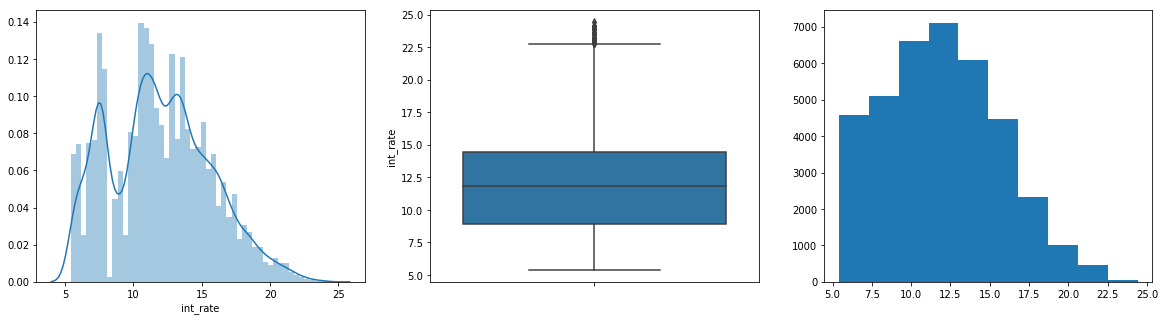

mean    12.038211
std      3.742432
min      5.420000
10%      7.140000
25%      9.250000
50%     11.860000
75%     14.610000
90%     17.040000
95%     18.620000
97%     19.420000
99%     20.990000
max     24.590000
Name: int_rate, dtype: float64


In [19]:
#int_rate
plotContinousVar(loan_data,'int_rate',False)
print(condf['int_rate'])

#since the int_rate dist plot has some bins to it, we can create probably categories out of it.
def int_rate_grp(int_rate):
    if(int_rate <= 8.0):
        return "low"
    elif (int_rate > 8.0 and int_rate <= 18.0):
        return "medium"
    else:
        return "high"

loan_data['int_rate_grp'] = loan_data['int_rate'].apply(int_rate_grp)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


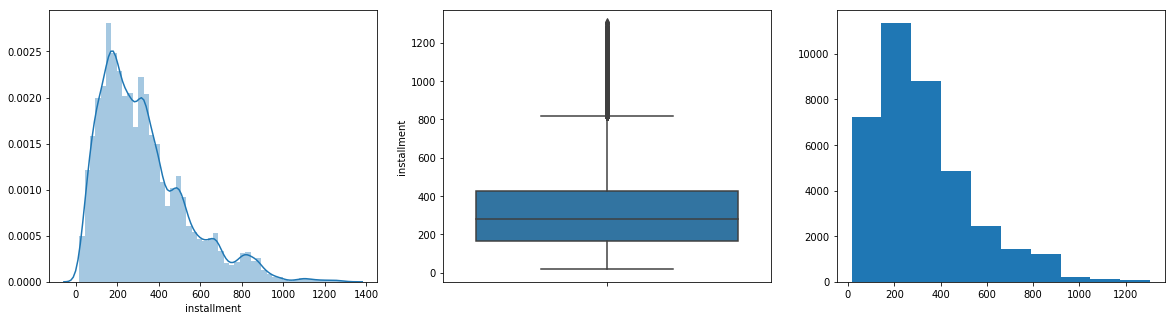

mean     324.928460
std      208.813764
min       16.080000
10%       99.978000
25%      167.340000
50%      280.620000
75%      430.942500
90%      622.130000
95%      762.080000
97%      832.500000
99%      933.050000
max     1305.190000
Name: installment, dtype: float64
lower bound  0
upper bound  816.1750000000001


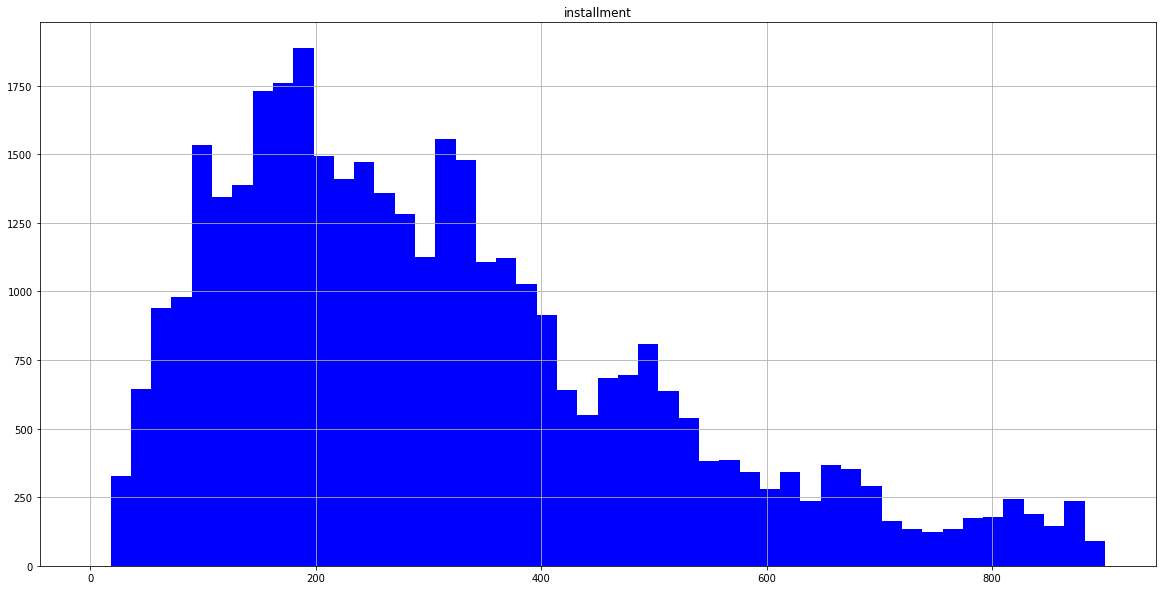

In [20]:
## feature: installment
## Description: The monthly payment owed by the borrower if the loan originates.

plotContinousVar(loan_data,'installment',False)
print(condf['installment'])
lower,upper = outlierranges(loan_data,'installment',1.5)

# loan_data = loan_data.loc[loan_data['installment'] < upper]
# loan_data.installment.describe()
loan_data.hist(column='installment',
                  figsize=(20,10),
                  bins=50,
                  color="blue",
                  range= (0,900))
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


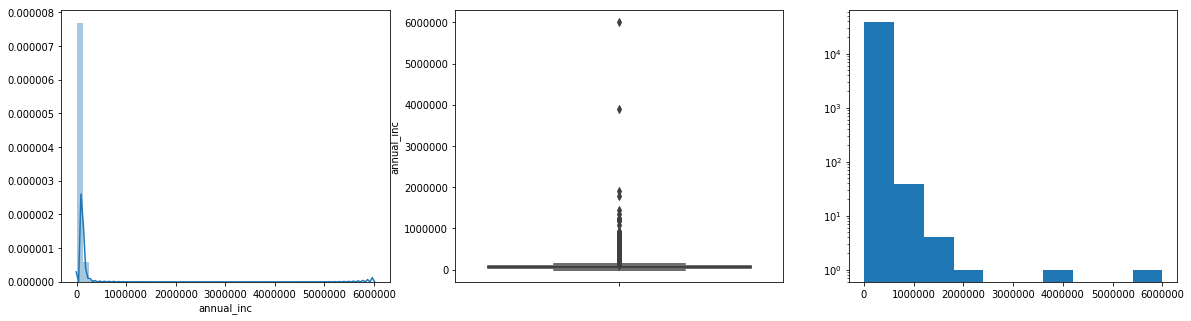

mean    6.902886e+04
std     6.319073e+04
min     4.000000e+03
10%     3.000000e+04
25%     4.080000e+04
50%     5.931900e+04
75%     8.250000e+04
90%     1.160000e+05
95%     1.420000e+05
97%     1.650000e+05
99%     2.346040e+05
max     6.000000e+06
Name: annual_inc, dtype: float64
lower bound  0
upper bound  144556.0
4.740466101694915


<Figure size 1440x360 with 0 Axes>

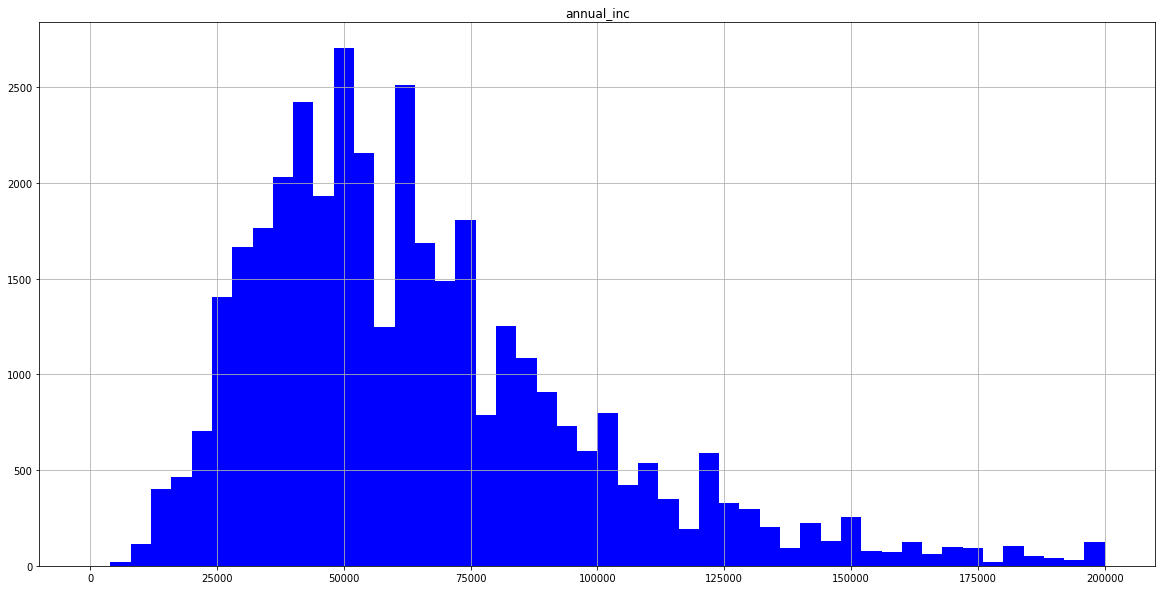

count     35970.000000
mean      61190.155251
std       27994.948974
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      144500.000000
Name: annual_inc, dtype: float64

In [21]:
## feature: annual_inc
## Description: The self-reported annual income provided by the borrower during registration.

plotContinousVar(loan_data,'annual_inc',True)
plt.figure(figsize=(20,5))

print(condf['annual_inc'])
lower,upper = outlierranges(loan_data,'annual_inc',1.5)

## Lets check number of records with annual income > 140000
#loan_data = loan_data.loc[loan_data['installment'] < upperbound]
#loan_data.shape
print((loan_data.loc[loan_data['annual_inc'] > upper].shape[0] / loan_data.shape[0]) * 100)

#We have 1.89% outliers with annual income. Lets remove these outliers-
loan_data.hist(column='annual_inc',
                  figsize=(20,10),
                  bins=50,
                  color="blue",
                  range= (0,200000))
plt.show()
loan_data = loan_data.loc[loan_data['annual_inc'] < upper]
loan_data.annual_inc.describe()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


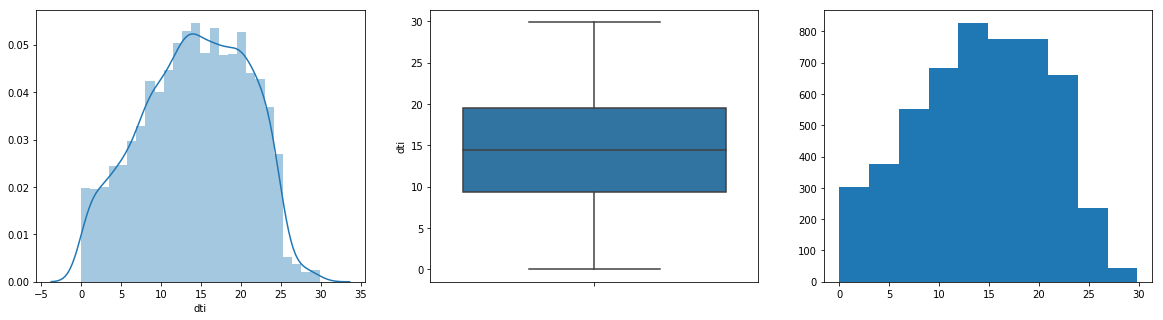

mean    13.365333
std      6.667755
min      0.000000
10%      4.159000
25%      8.240000
50%     13.450000
75%     18.630000
90%     22.370000
95%     23.850000
97%     24.550000
99%     26.710100
max     29.990000
Name: dti, dtype: float64


In [22]:
## feature: dti
## Description: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, 
## excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

plotContinousVar(loan_data.loc[loan_data.loan_status==1],'dti',False)
print(condf['dti'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


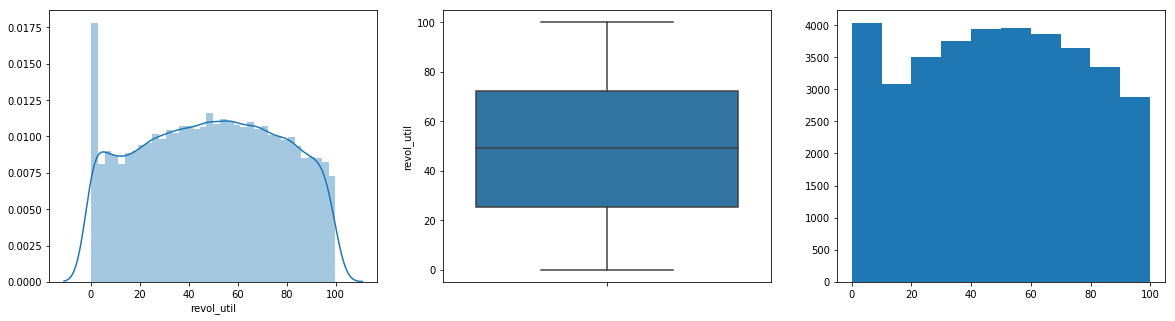

mean    48.953362
std     28.306342
min      0.000000
10%      8.700000
25%     25.500000
50%     49.500000
75%     72.500000
90%     87.900000
95%     93.600000
97%     95.900000
99%     98.500000
max     99.900000
Name: revol_util, dtype: float64


In [23]:
## feature: revol_util
## Description: Revolving line utilization rate, 
## or the amount of credit the borrower is using relative to all available revolving credit.

plotContinousVar(loan_data,'revol_util',False)
print(condf['revol_util'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


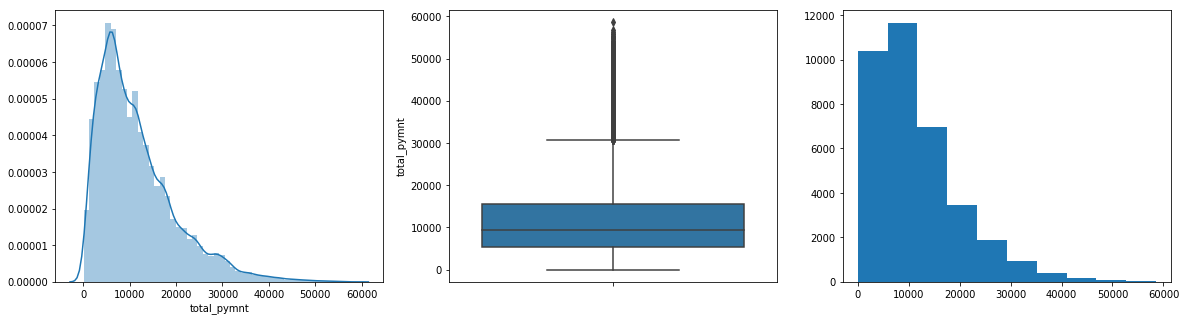

mean    12219.613500
std      9068.385266
min        33.730000
10%      3013.711999
25%      5599.920800
50%      9962.222901
75%     16615.496632
90%     24879.828000
95%     30358.366520
97%     34175.969100
99%     42343.651588
max     58563.679930
Name: total_pymnt, dtype: float64
lower bound  0
upper bound  30711.446641374998
3.561301084236864


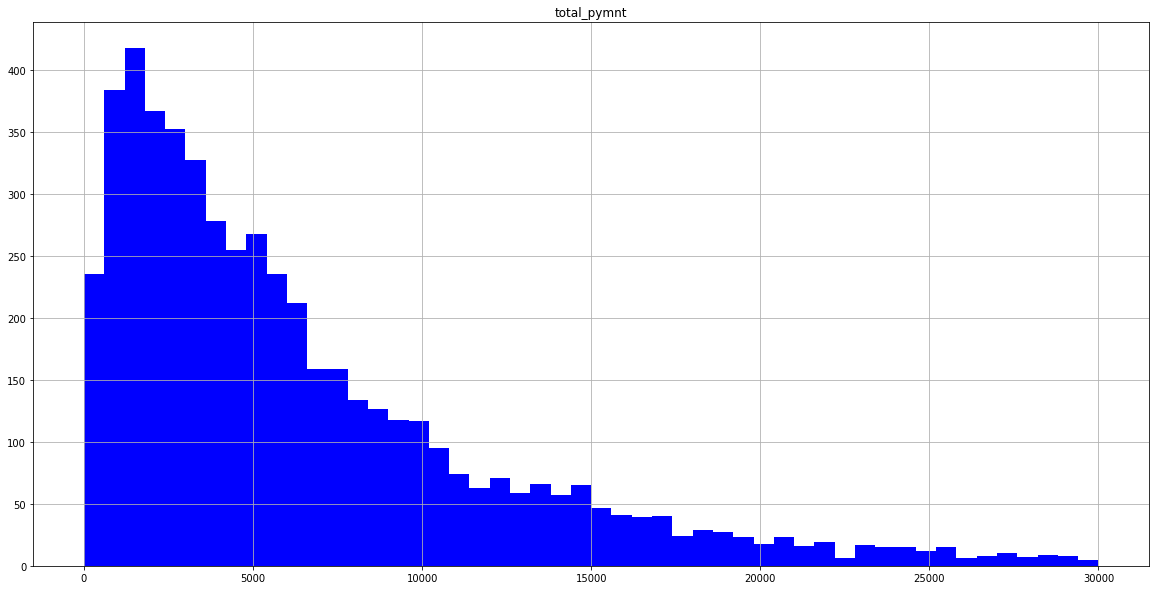

In [24]:
## feature: total_pymnt
## Description: Payments received to date for total amount funded.

plotContinousVar(loan_data,'total_pymnt',False)
print(condf['total_pymnt'])
lower,upper = outlierranges(loan_data,'total_pymnt',1.5)

## lets see the percentage of outlier records
print((loan_data[loan_data['total_pymnt'] > upper].shape[0] / loan_data.shape[0]) * 100)
loan_data = loan_data[loan_data['total_pymnt'] < upper]
loan_data.total_pymnt.describe()

loan_data.loc[loan_data.loan_status==1].hist(column='total_pymnt',
                  figsize=(20,10),
                  bins=50,
                  color="blue",
                  range= (0,30000))
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


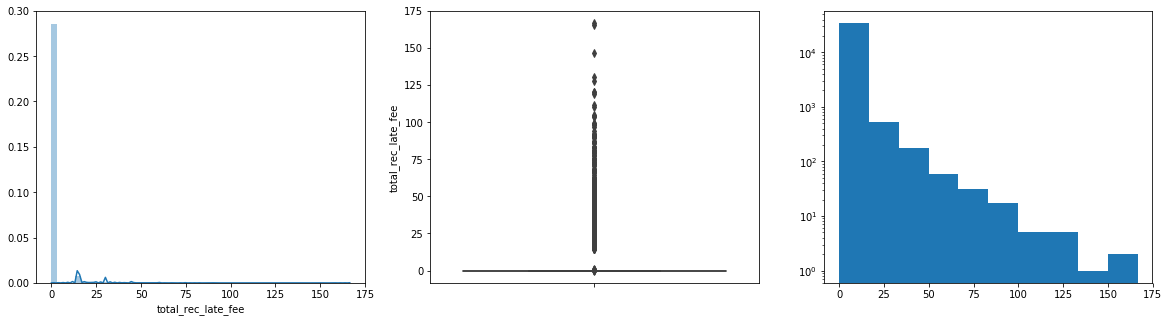

mean      1.326985
std       7.140484
min       0.000000
10%       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
90%       0.000000
95%      14.885073
97%      15.000000
99%      32.822879
max     180.200000
Name: total_rec_late_fee, dtype: float64
lower bound  0.0
upper bound  0.0
5.0477096485917725


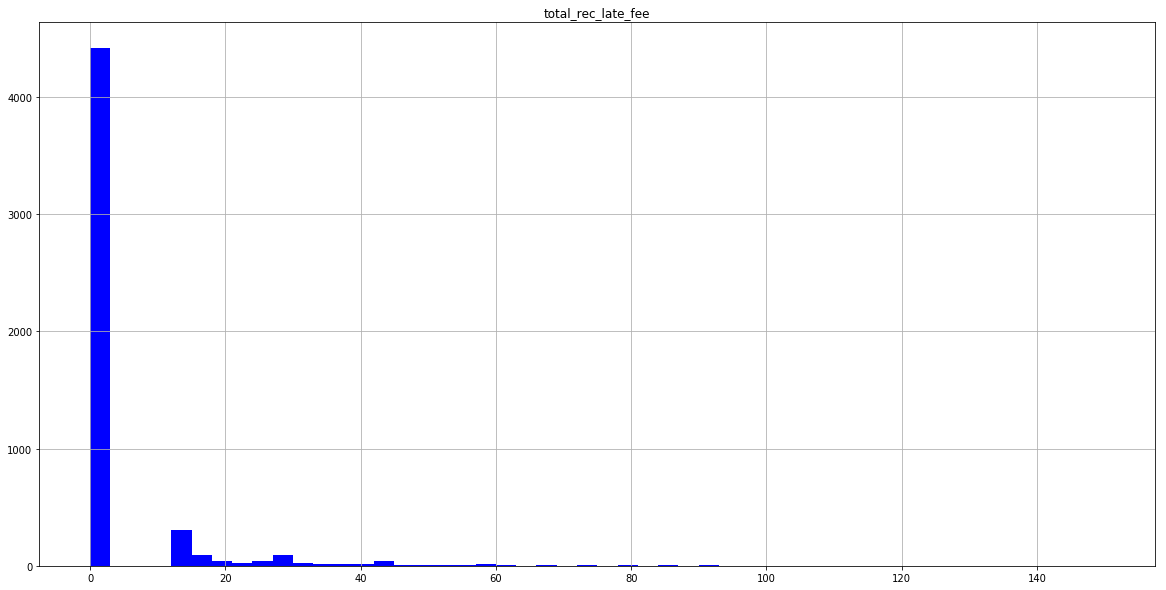

In [25]:
# total_rec_late_fee	Late fees received to date

plotContinousVar(loan_data,'total_rec_late_fee',True)
print(condf['total_rec_late_fee'])
lower,upper = outlierranges(loan_data,'total_rec_late_fee',1.5)

## lets see the percentage of outlier records
print((loan_data[loan_data['total_rec_late_fee'] > upper].shape[0] / loan_data.shape[0]) * 100)
# loan_data1 = loan_data[loan_data['total_rec_prncp'] < upper]
# print(loan_data1.total_pymnt.describe())
# print(loan_data1.shape)

# Univariate Analysis for total_rec_late_fee field
# Mean is higher than Median value because of Outliers present in the data.
# 90 to 100 percentile contains around 100% of the Value.
# So, Median is the representative value for this column.

# Density Plot for this column shows a Spike at 0 because 0 to 90 percentile contains just 0.
# No Outliers
# Histogram Shows the frequency of different values.
loan_data.loc[loan_data.loan_status==1].hist(column='total_rec_late_fee',
                  figsize=(20,10),
                  bins=50,
                  color="blue",
                  range= (0,150))
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


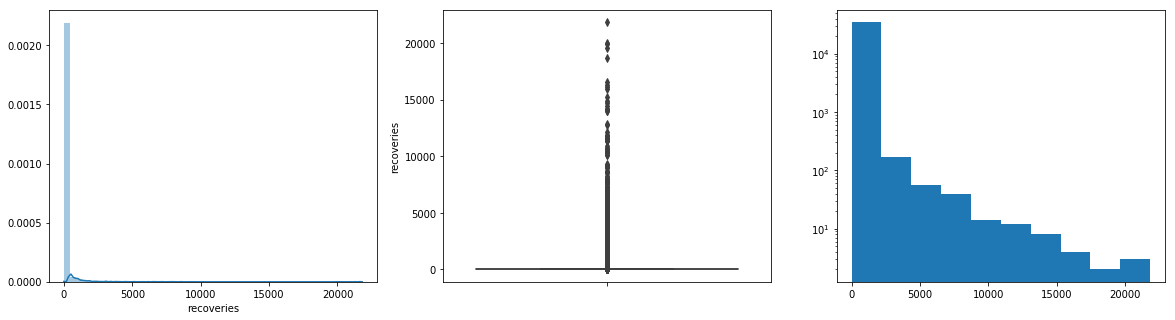

mean       94.094361
std       684.663780
min         0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%        12.521000
95%       355.329000
97%       723.260200
99%      2008.250100
max     29623.350000
Name: recoveries, dtype: float64


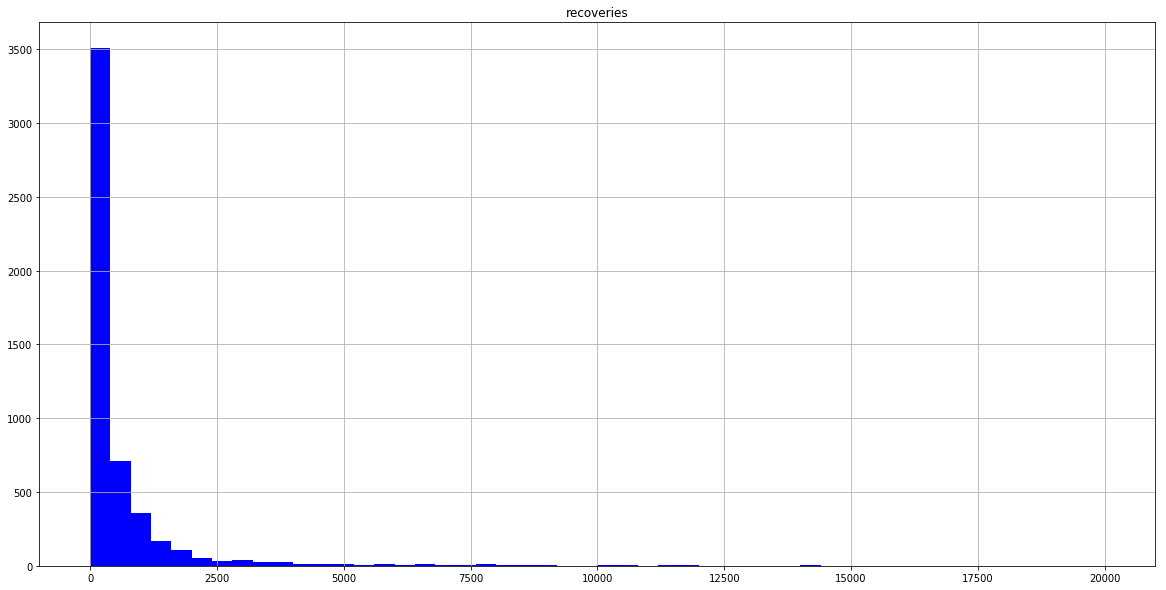

In [26]:
# recoveries	post charge off gross recovery

plotContinousVar(loan_data,'recoveries',True)
print(condf['recoveries'])

loan_data.loc[loan_data.loan_status==1].hist(column='recoveries',
                  figsize=(20,10),
                  bins=50,
                  color="blue",
                  range= (0,20000))
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


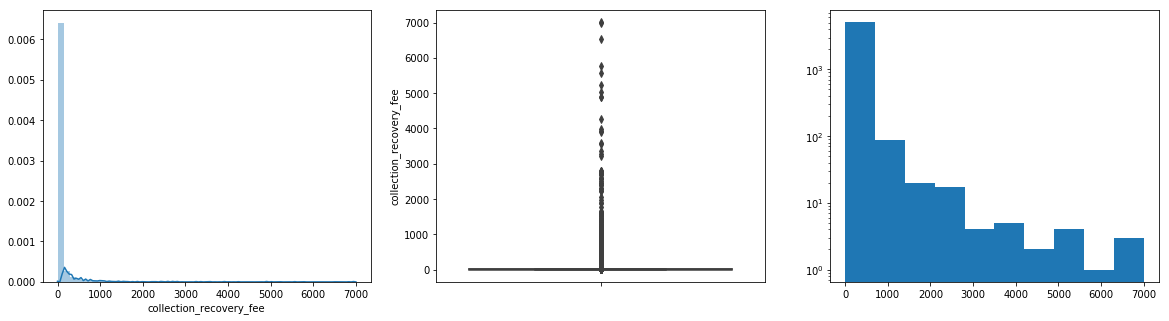

mean      12.096079
std      146.980017
min        0.000000
10%        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
90%        0.000000
95%        5.030000
97%       12.687080
99%      284.636106
max     7002.190000
Name: collection_recovery_fee, dtype: float64


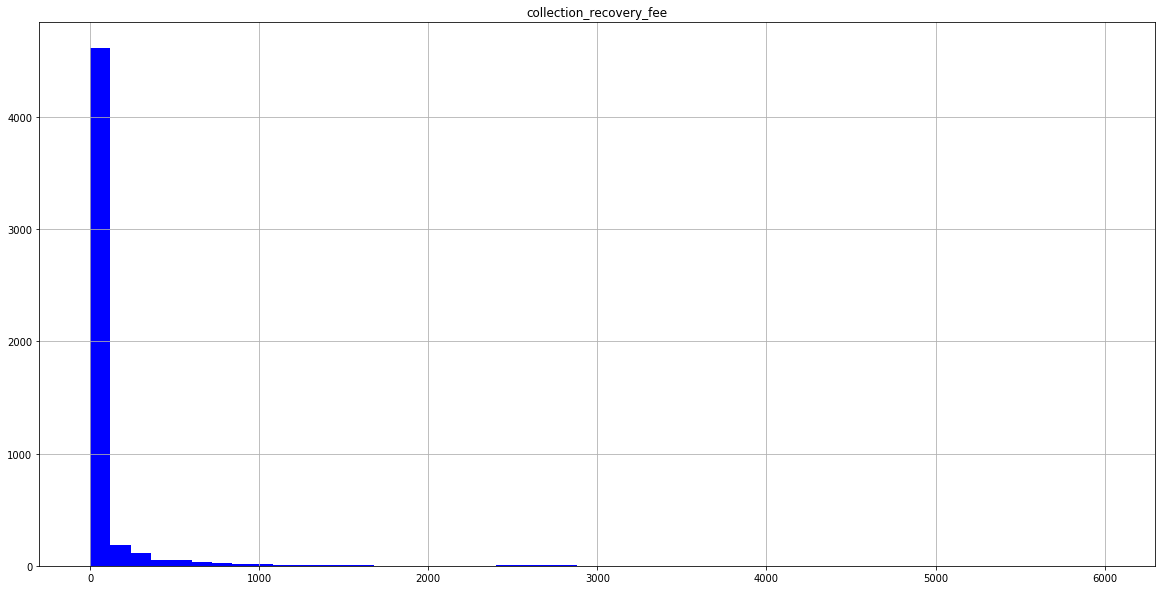

In [27]:
# collection_recovery_fee	post charge off collection fee

plotContinousVar(loan_data.loc[loan_data.loan_status==1],'collection_recovery_fee',True)
print(condf['collection_recovery_fee'])

loan_data.loc[loan_data.loan_status==1].hist(column='collection_recovery_fee',
                  figsize=(20,10),
                  bins=50,
                  color="blue",
                  range= (0,6000))
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


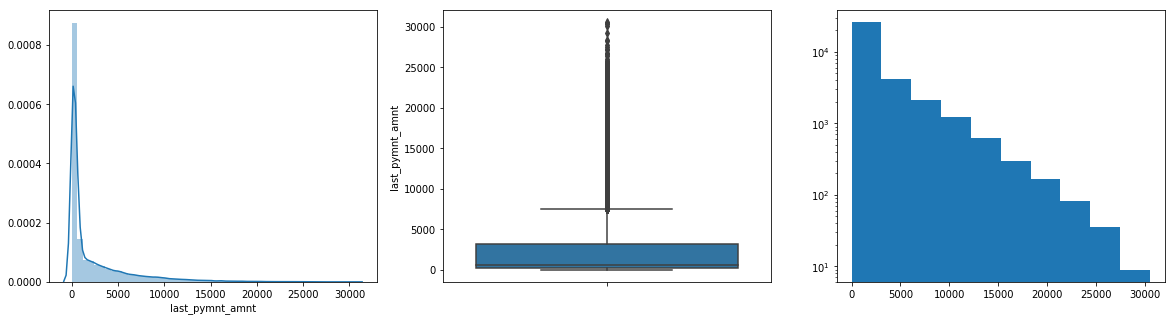

mean     2706.427113
std      4468.663306
min         0.010000
10%        98.639000
25%       221.367500
50%       554.550000
75%      3350.790000
90%      8396.797000
95%     12244.224000
97%     15113.806900
99%     21209.162000
max     36115.200000
Name: last_pymnt_amnt, dtype: float64


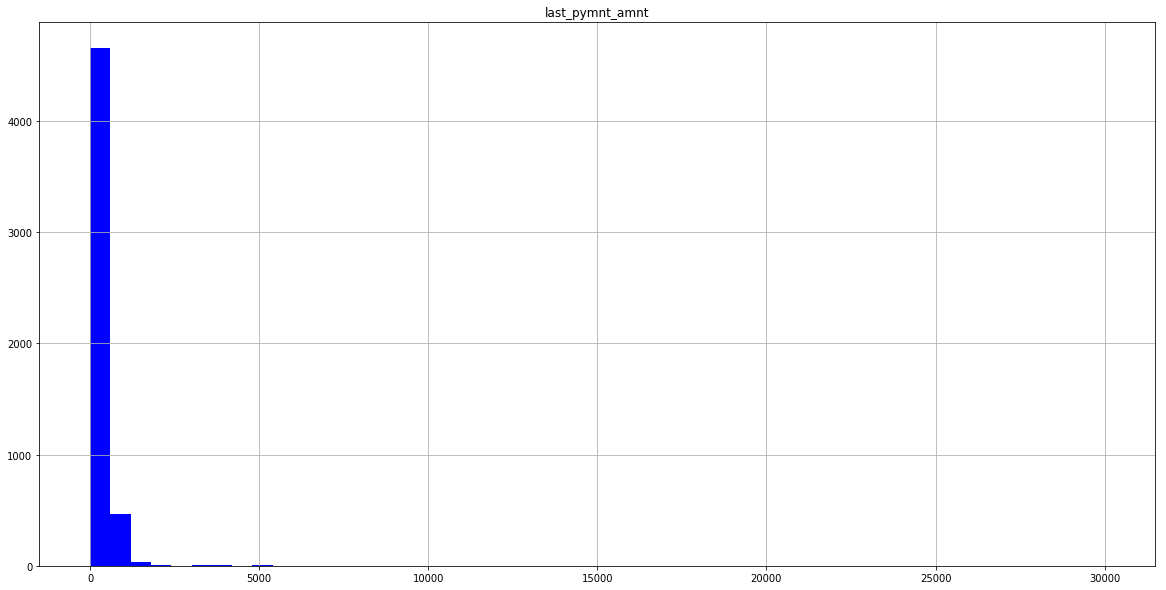

In [28]:
# last_pymnt_amnt	Last total payment amount received

plotContinousVar(loan_data,'last_pymnt_amnt',True)
print(condf['last_pymnt_amnt'])

loan_data.loc[loan_data.loan_status==1].hist(column='last_pymnt_amnt',
                  figsize=(20,10),
                  bins=50,
                  color="blue",
                  range= (0,30000))
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


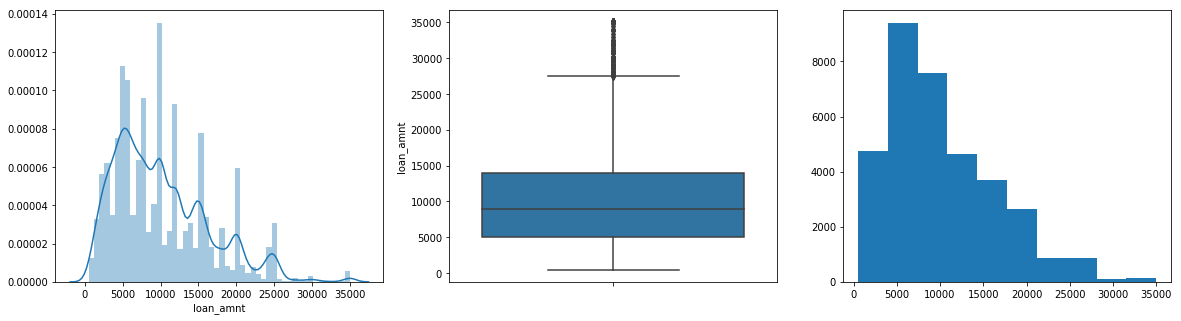

mean    11255.291131
std      7471.574724
min       500.000000
10%      3200.000000
25%      5500.000000
50%     10000.000000
75%     15000.000000
90%     22100.000000
95%     25000.000000
97%     30000.000000
99%     35000.000000
max     35000.000000
Name: loan_amnt, dtype: float64
lower bound  0
upper bound  27500.0
0.8331171264666032
count    34398.000000
mean     10498.874989
std       6845.128235
min         33.730000
25%       5296.259116
50%       9005.149027
75%      14514.470262
max      30705.060030
Name: total_pymnt, dtype: float64
(34398, 34)


In [29]:
# loan_amnt	The listed amount of the loan applied for by the borrower. 
#If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

plotContinousVar(loan_data,'loan_amnt',False)
print(condf['loan_amnt'])
lower,upper = outlierranges(loan_data,'loan_amnt',1.5)

## lets see the percentage of outlier records
print((loan_data[loan_data['loan_amnt'] > upper].shape[0] / loan_data.shape[0]) * 100)
loan_data = loan_data[loan_data['loan_amnt'] < upper]
print(loan_data.total_pymnt.describe())
print(loan_data.shape)


## From the loan amount distribution we can see that median (50th percentile) of the loan amount is 10000. Lets use this make some bins and analyse the default rates across different amounts

In [39]:
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
loan_data['loan_amnt_bin'] = loan_data['loan_amnt'].apply(lambda x: loan_amount(x))


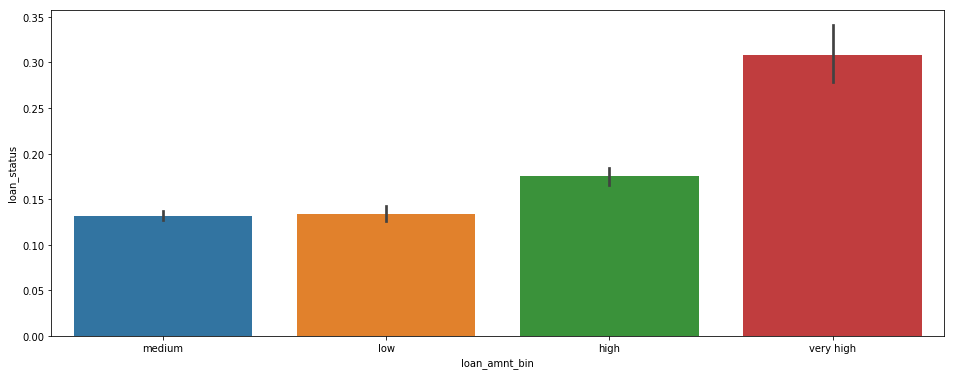

In [41]:
## Lets plot and see default rates across these categories of loan amounts
plt.figure(figsize=(16, 6))
sns.barplot(x='loan_amnt_bin', y='loan_status', data=loan_data)
plt.show()

### We can clearly see that higher the loan amount, more are the chances of default.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


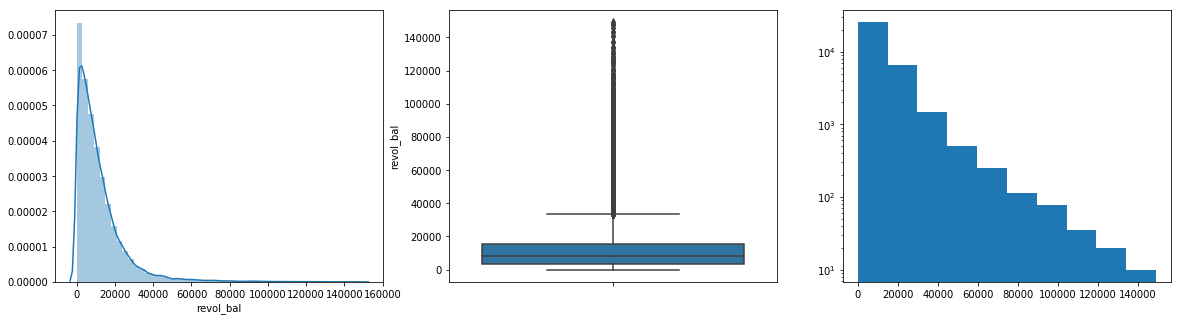

mean     13404.961851
std      15849.136368
min          0.000000
10%       1152.900000
25%       3745.000000
50%       8886.000000
75%      17088.000000
90%      29164.800000
95%      41614.300000
97%      53056.090000
99%      82447.940000
max     149588.000000
Name: revol_bal, dtype: float64
lower bound  0
upper bound  33612.0
5.607884179312751


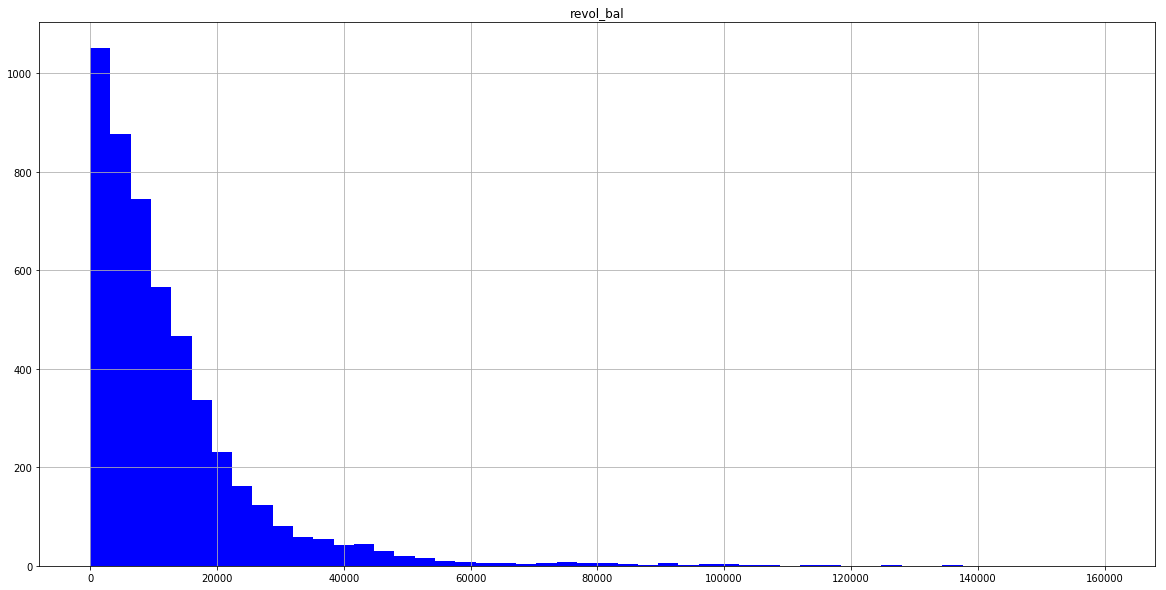

In [30]:
# revol_bal	Total credit revolving balance

plotContinousVar(loan_data,'revol_bal',True)
print(condf['revol_bal'])
lower,upper = outlierranges(loan_data,'revol_bal',1.5)

## lets see the percentage of outlier records
print((loan_data[loan_data['revol_bal'] > upper].shape[0] / loan_data.shape[0]) * 100)

loan_data.loc[loan_data.loan_status==1].hist(column='revol_bal',
                  figsize=(20,10),
                  bins=50,
                  color="blue",
                  range= (0,160000))
plt.show()

count    34398.000000
mean      4699.111660
std       2230.740523
min        265.720000
25%       3028.622500
50%       4298.265000
75%       5966.502500
90%       7919.571000
95%       9239.475000
99%      10843.475400
max      11946.310000
Name: month_saved_amnt, dtype: float64


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


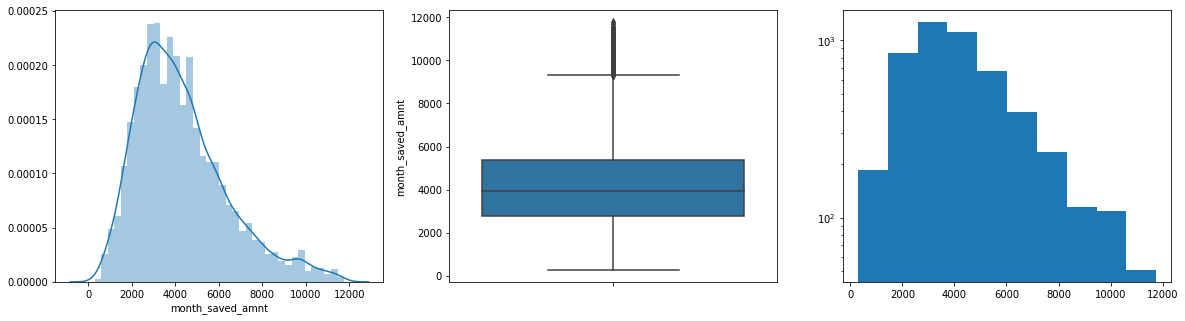

lower bound  0
upper bound  9309.330000000002
4.817140531426245


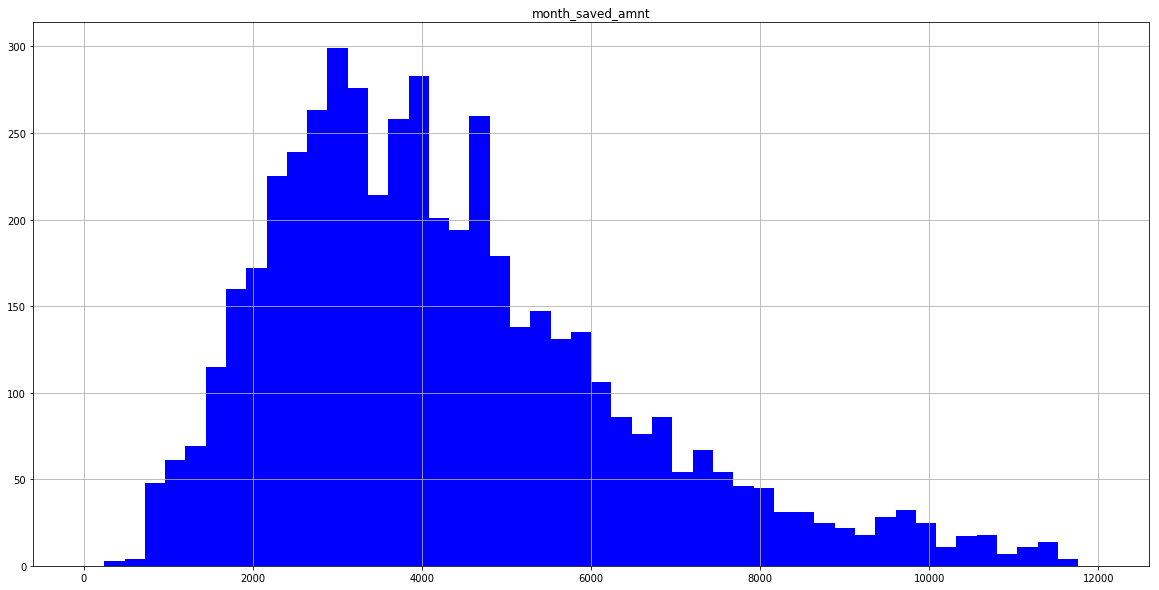

In [31]:
#Derive the ratio of savings that a borrower can have by doing for math (annual_inc/12)-installment and see how the variable

loan_data['month_saved_amnt'] = round((loan_data['annual_inc']/12)-loan_data['installment'],2)
print(loan_data.month_saved_amnt.describe([0.25,0.75,0.9,0.95,0.99]))

plotContinousVar(loan_data.loc[loan_data.loan_status==1],'month_saved_amnt',True)
lower,upper = outlierranges(loan_data.loc[loan_data.loan_status==1],'month_saved_amnt',1.5)

## lets see the percentage of outlier records
print((loan_data[loan_data['month_saved_amnt'] > upper].shape[0] / loan_data.shape[0]) * 100)

loan_data.loc[loan_data.loan_status==1].hist(column='month_saved_amnt',
                  figsize=(20,10),
                  bins=50,
                  color="blue",
                  range= (0,12000))
plt.show()

## Date type analysis to check on the charged off % and total amount funded

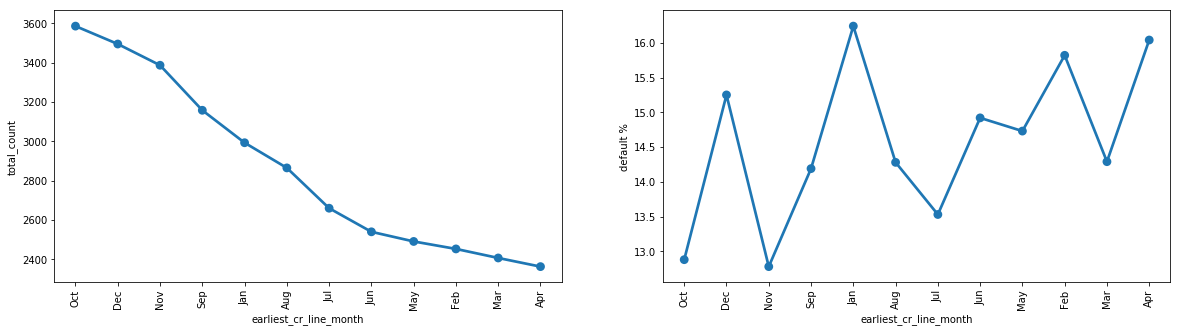

--------------------------------------------------------------------------------------------------------------------


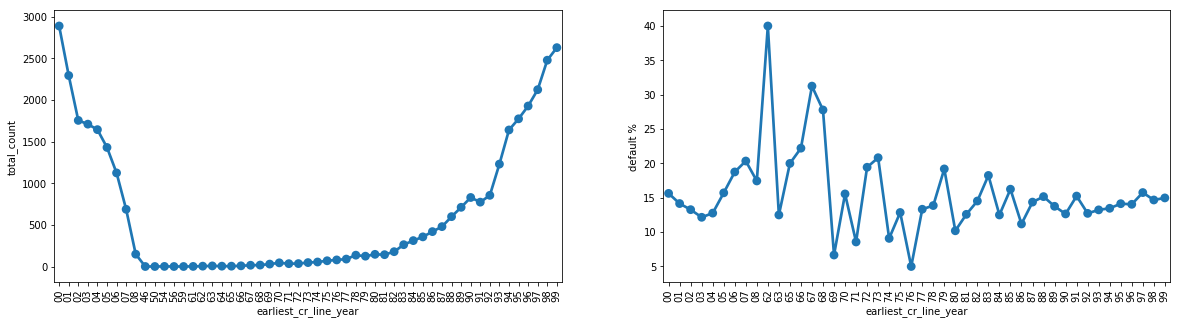

--------------------------------------------------------------------------------------------------------------------


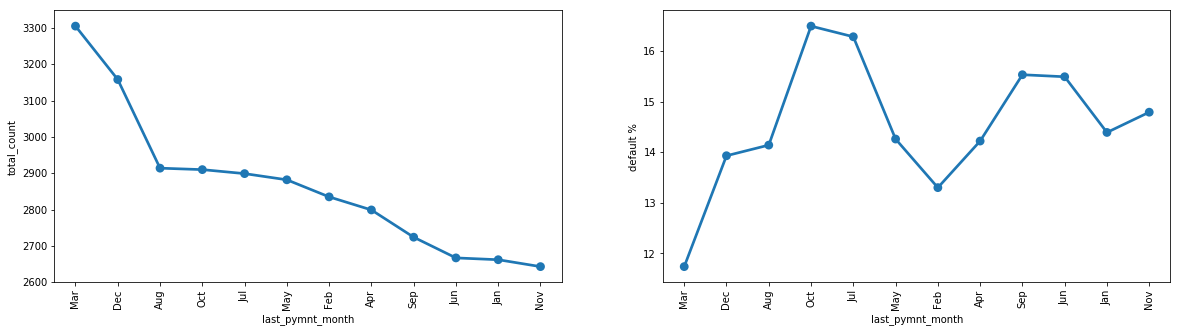

--------------------------------------------------------------------------------------------------------------------


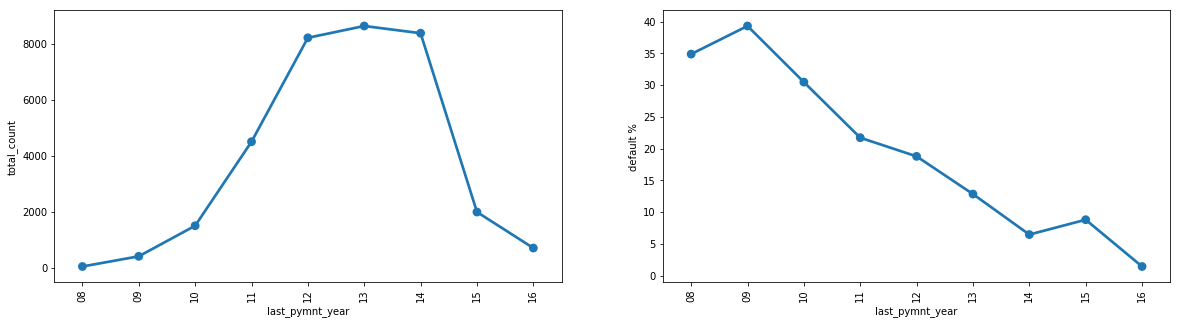

--------------------------------------------------------------------------------------------------------------------


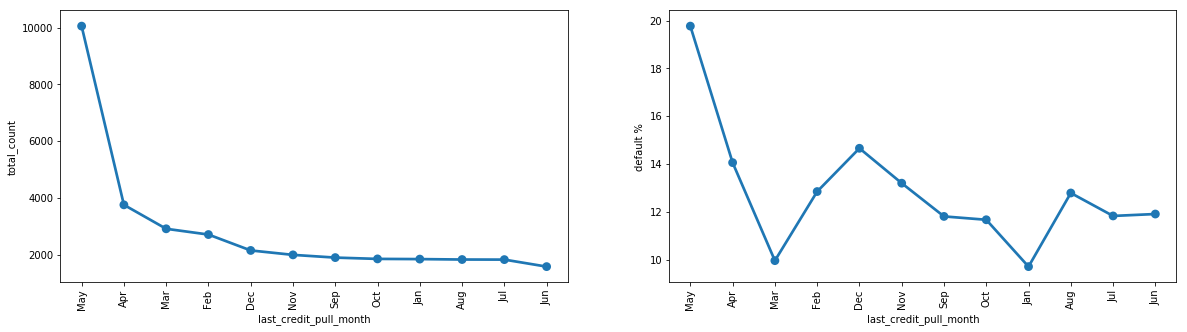

--------------------------------------------------------------------------------------------------------------------


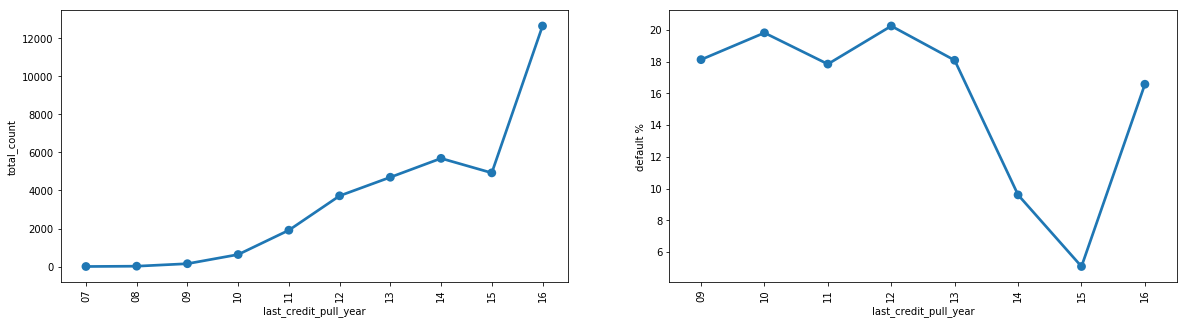

--------------------------------------------------------------------------------------------------------------------
(34398, 41)


In [32]:
getFirst = lambda x: str(x.split('-')[0])
getSecond = lambda x: str(x.split('-')[1])

loan_data['earliest_cr_line_month'] = loan_data['earliest_cr_line'].apply(getFirst)
loan_data['earliest_cr_line_year'] = loan_data['earliest_cr_line'].apply(getSecond)
loan_data['last_pymnt_month'] = loan_data['last_pymnt_d'].apply(getFirst)
loan_data['last_pymnt_year'] = loan_data['last_pymnt_d'].apply(getSecond)
loan_data['last_credit_pull_month'] = loan_data['last_credit_pull_d'].apply(getFirst)
loan_data['last_credit_pull_year'] = loan_data['last_credit_pull_d'].apply(getSecond)

date_cols = ['earliest_cr_line_month','earliest_cr_line_year','last_pymnt_month',\
             'last_pymnt_year','last_credit_pull_month','last_credit_pull_year']

for each in date_cols:
    count_df, final_df = getDefaultPercentageDF(loan_data,each)

    #plot to understand where the maximum loans are lended/funded 
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.pointplot(x=each, y="total_count", data=count_df)
    plt.xticks(rotation=90)
    
    plt.subplot(122)
    sns.pointplot(x=each, y="default %", data=final_df)
    plt.xticks(rotation=90)
    
    plt.show()
    print('--------------------------------------------------------------------------------------------------------------------')
    
print(loan_data.shape)

# Inferences from univariate analysis

****Selecting the variables which might give good insigths on the data****

1) emp_length --> we can see that higher exp people are showing more defaults

2) home_ownership --> 1 category is showing 19% of default, use in bivariate 

3) verification_status --> 1 category i.e. Verified is shwoing 16% of defaults

4) purpose --> Small business categories is showing > 25% of defaults

5) state --> observed good power law distribution for states CA, NY, FL, TX

6) grade --> some grades are showing around 30% of default

7) last_pymnt_year --> some years show around 20% - 40% defaults, which includes year 2009 which was recession 

8) int_rate --> split into multiple bins and analyzed further

9) month_saved_amnt --> business combined data WRT to installment and annual_inc which were showing good normal distributions

10) total_payment , revol_bal, loan_amnt --> Showing promising distribution for analysis

****dropping the below variables which were kind of showing less significance on Charged Off data.****

1) revol_util,dti --> kind of flat distribution/histogram plots

2) total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt --> all of them show 0 values for the chanrged off loan_data

3) earliest_cr_line --> power law distribution shows that LSH and RHS are only showing max loans provided, and center part low number of loans and less data

4) last_pymnt_d -- > converted to last last_pymt_year

5) last_credit_pull_d --> giving same insights as that of last_payment_year

## Segmented Univariate Analysis


- From the univariate analysis we saw that there are some clear preditors for loan defaults like loan purpose, duration, interest rate, annual income, grade, loan amount.

- from the business point of view, its always makes sense to have analysis on the purpose of the loan. Lets see is we can get some more insights from the purpose itself.



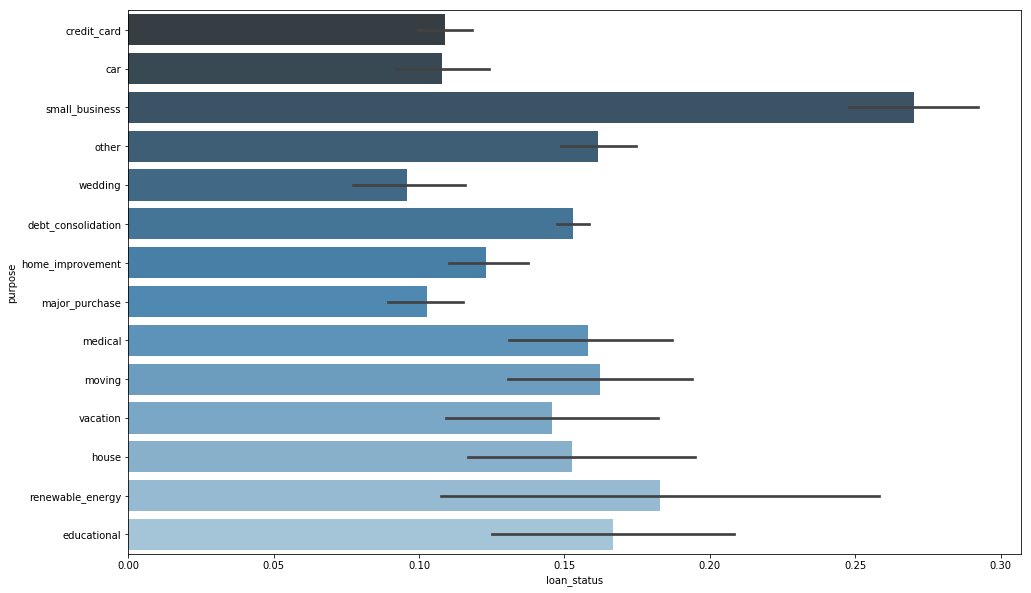

In [46]:
# We have already seen that small business have more default rates than other categories in univariate analysis. 
# Lets see which other purposes makes more sense and then examin them.
plt.figure(figsize=(16, 10))
sns.barplot(x='loan_status',y='purpose', data=loan_data, palette="Blues_d")
plt.show()

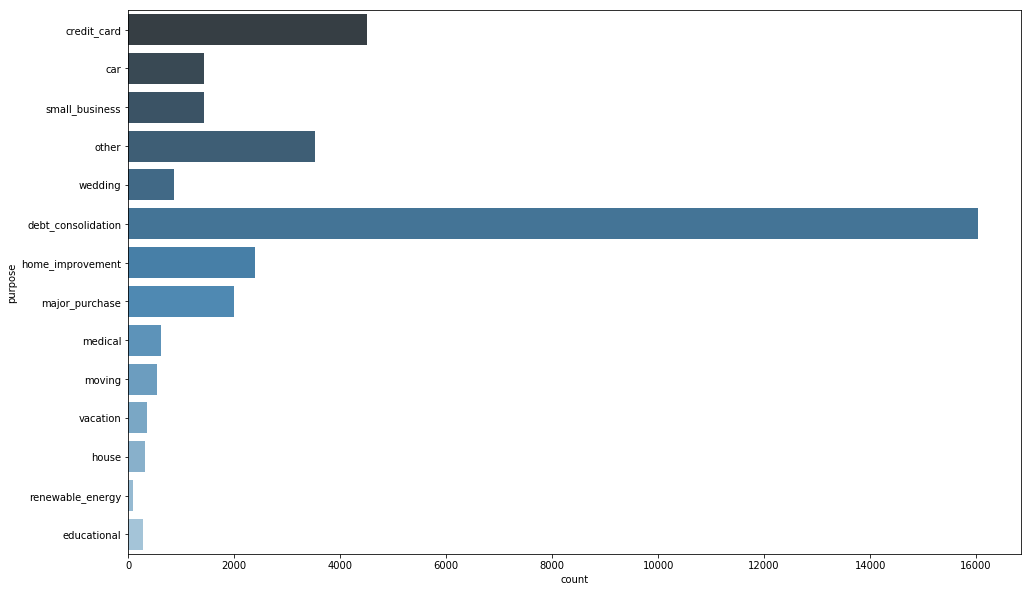

In [50]:
## Also check the most used type of loans
plt.figure(figsize=(16, 10))
sns.countplot(y="purpose", data=loan_data, palette="Blues_d")

In [51]:
loan_data['purpose'].value_counts()

debt_consolidation    16046
credit_card            4505
other                  3524
home_improvement       2396
major_purchase         1995
car                    1436
small_business         1433
wedding                 855
medical                 626
moving                  536
vacation                357
house                   308
educational             288
renewable_energy         93
Name: purpose, dtype: int64

### Now making use of the above two plots, we can see that most of the defaults are happening across
- small business
- renewable energy
- educational
- moving
- medical
### Most of the loans are from the categories:
- debt_consolidation
- credit_card
- others
- home_improvements
- major_purcases

### Lets now check the distribution of default percentage across identified features from univariate analysis i.e.

emp_length, home_ownership,verification_status, grade, last_pymnt_year, int_rate_grp, emp_length, loan_amnt_bin, 


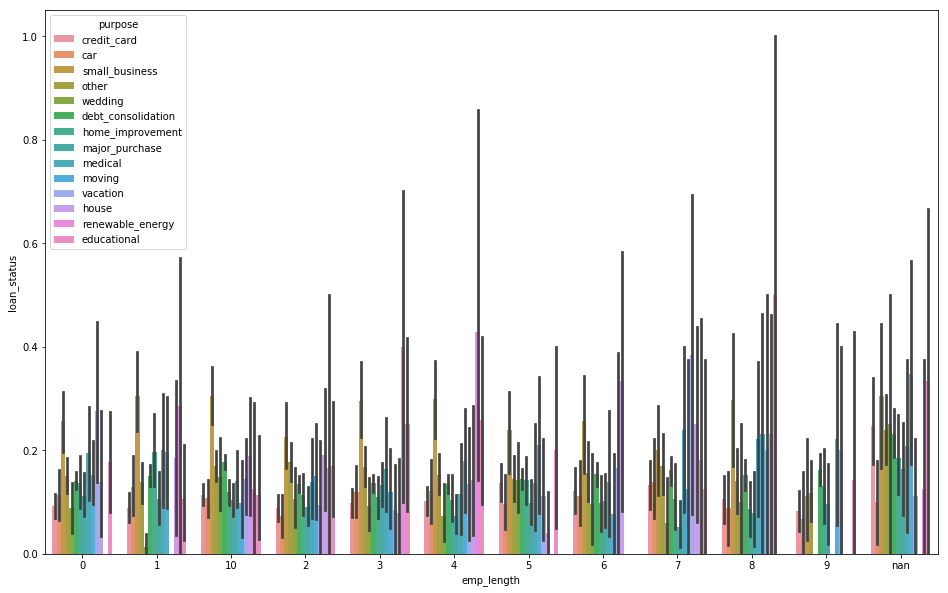

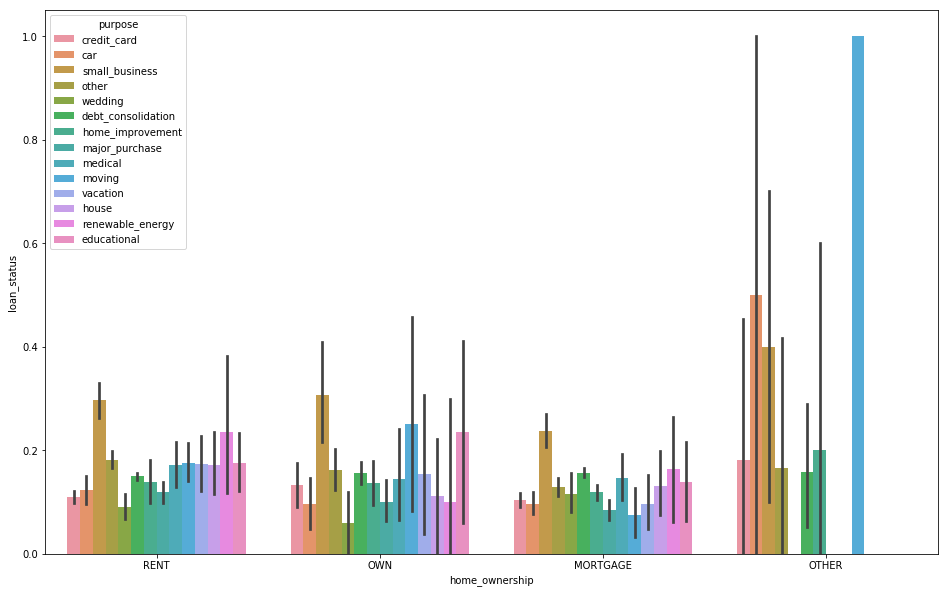

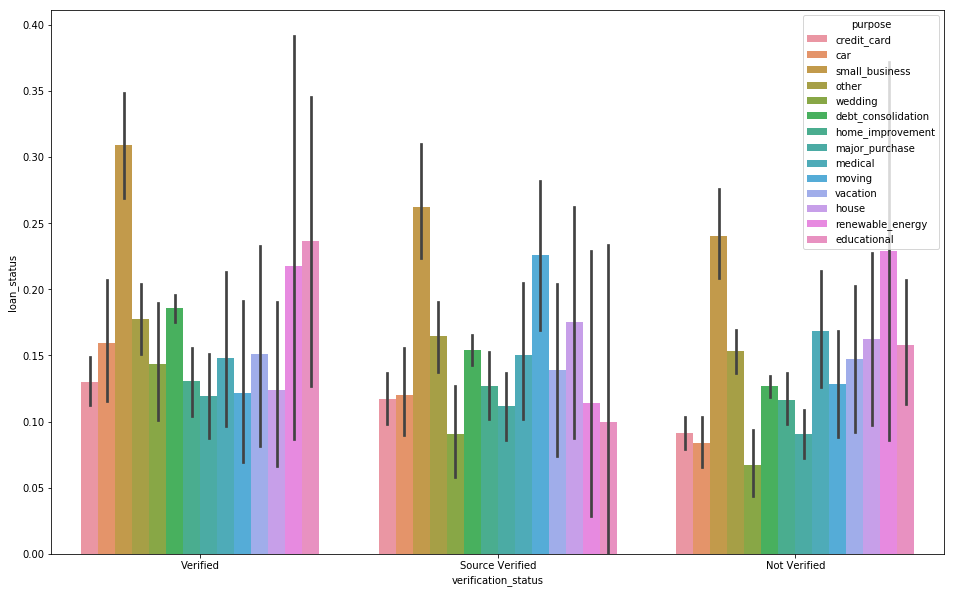

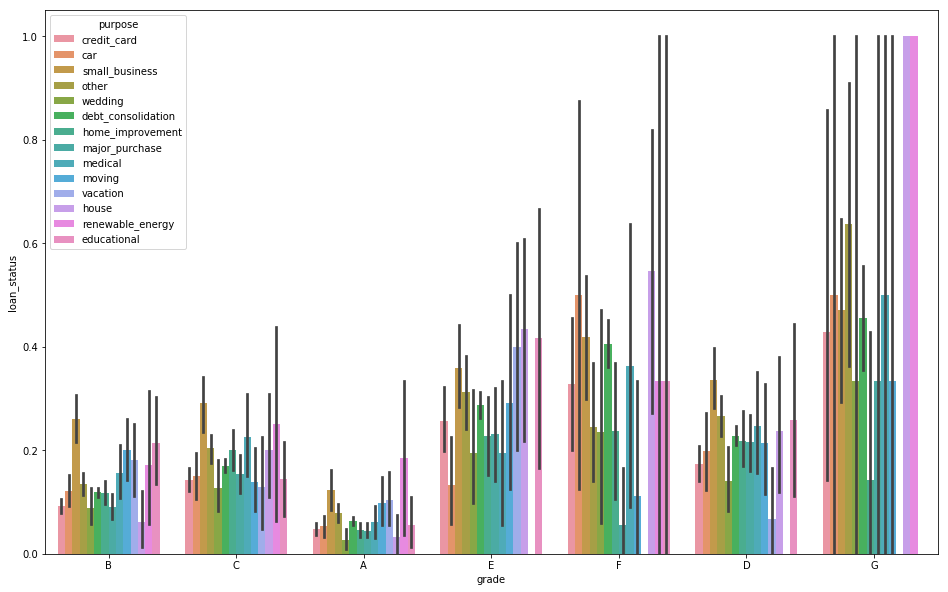

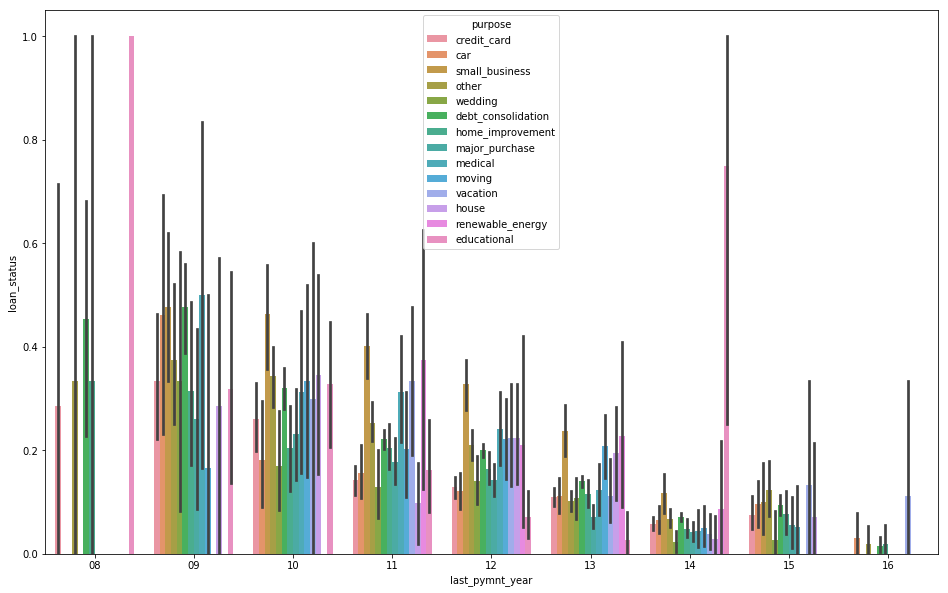

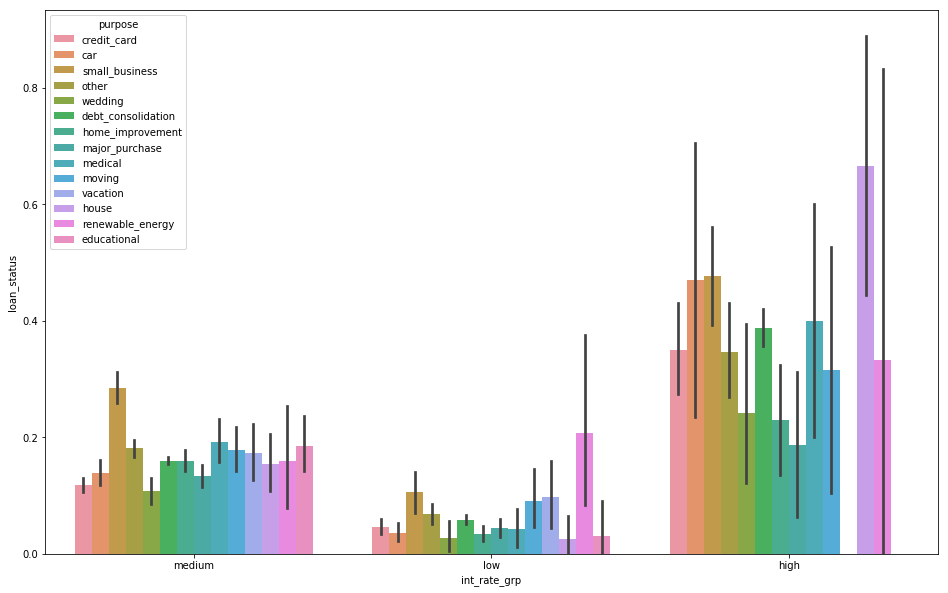

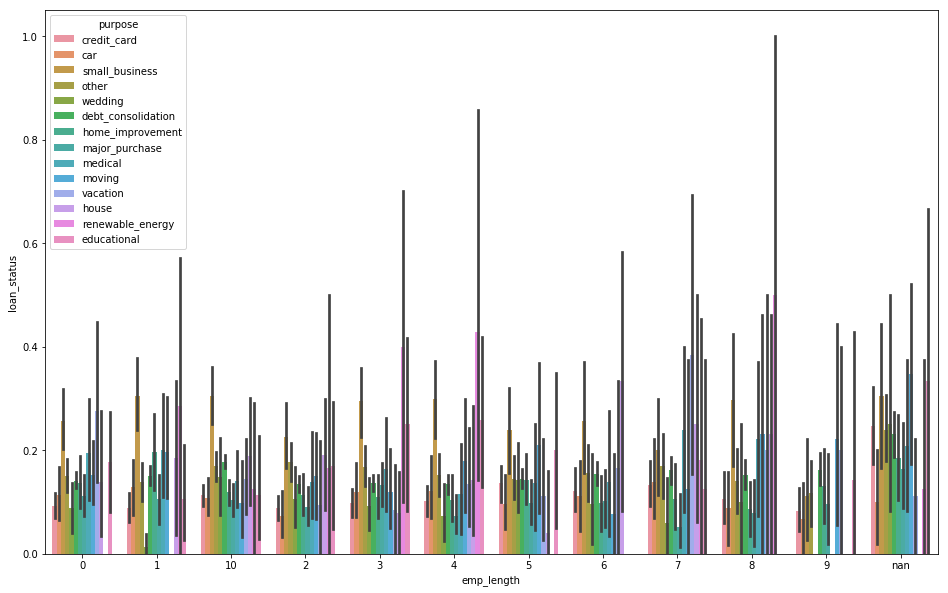

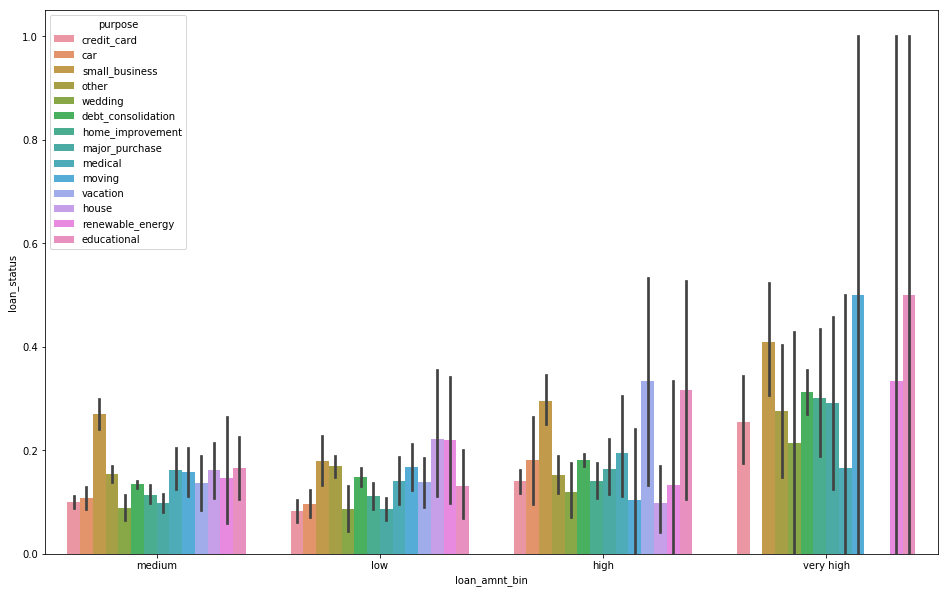

In [56]:
seg_features = ["emp_length", "home_ownership","verification_status", "grade", "last_pymnt_year", "int_rate_grp", "emp_length", "loan_amnt_bin"]

# plots for segmented analysis
for feature in seg_features:
    plt.figure(figsize=[16, 10])
    sns.barplot(x=feature, y="loan_status", hue='purpose', data=loan_data)
    plt.show()

# Bivariate Analysis

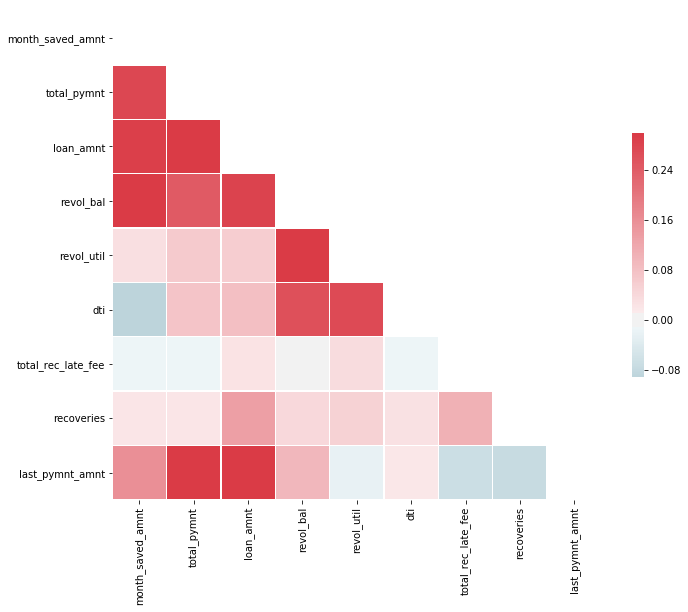

In [36]:
# Compute the correlation matrix
corr = loan_data[['month_saved_amnt','total_pymnt','loan_amnt','revol_bal','revol_util','dti',\
                  'total_rec_late_fee','recoveries','last_pymnt_amnt']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

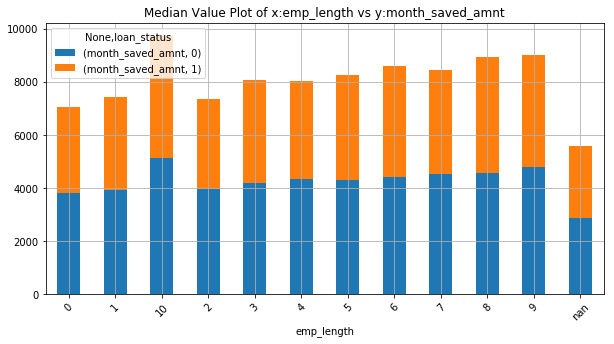

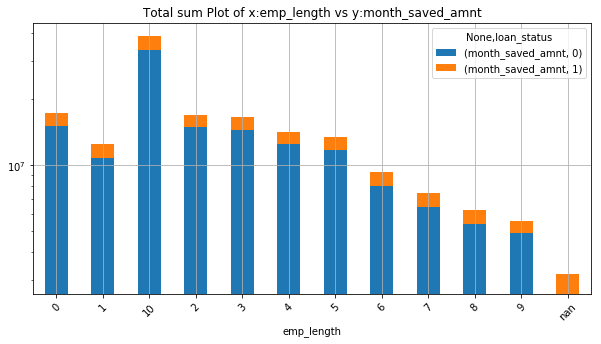

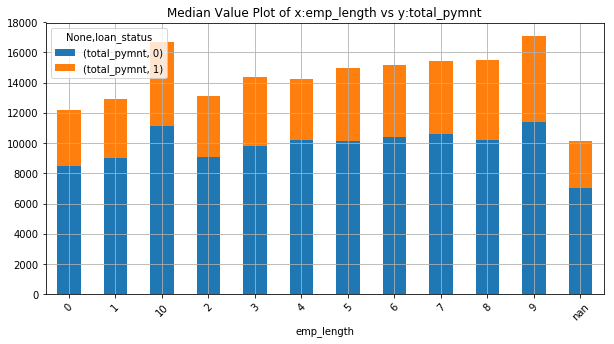

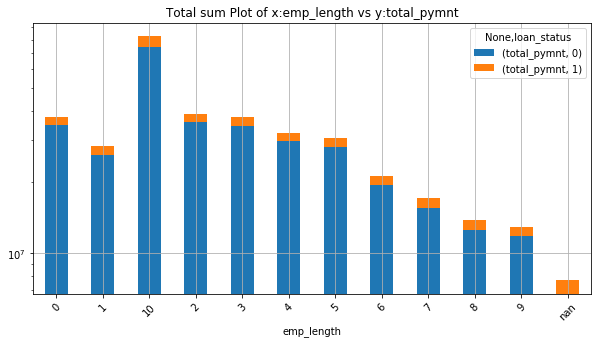

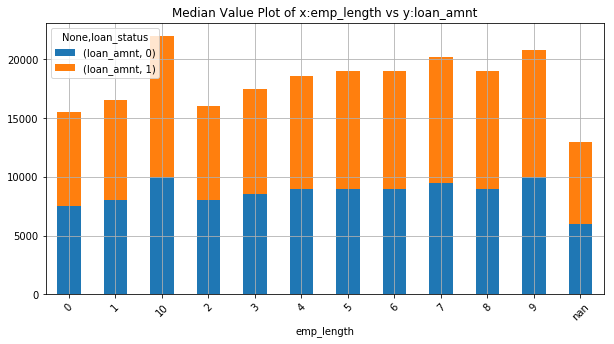

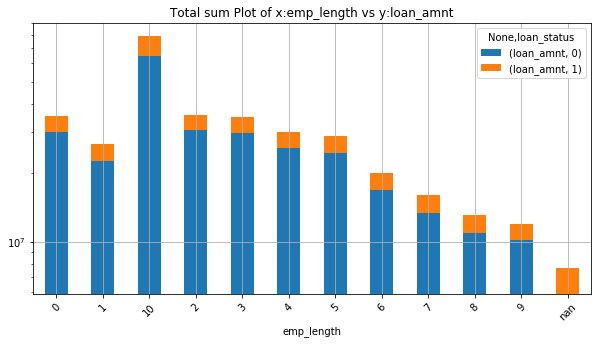

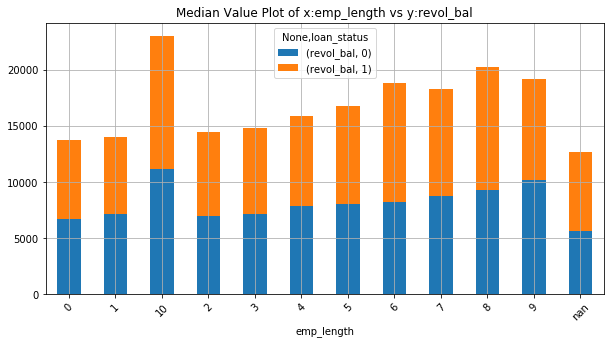

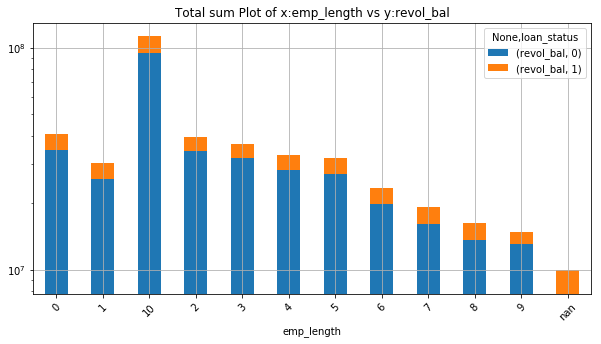

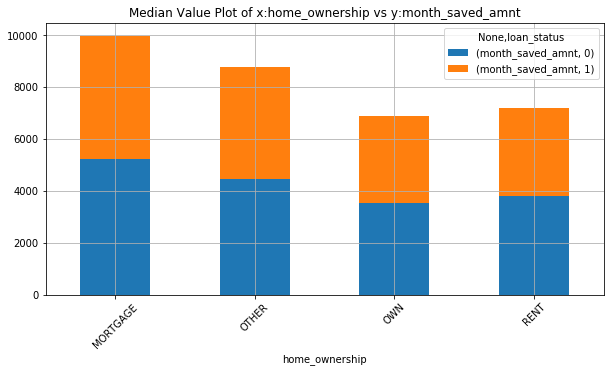

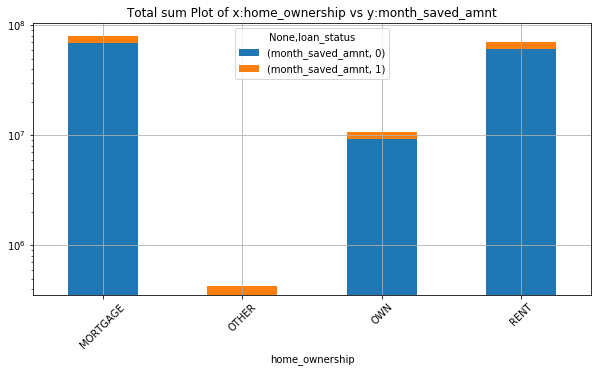

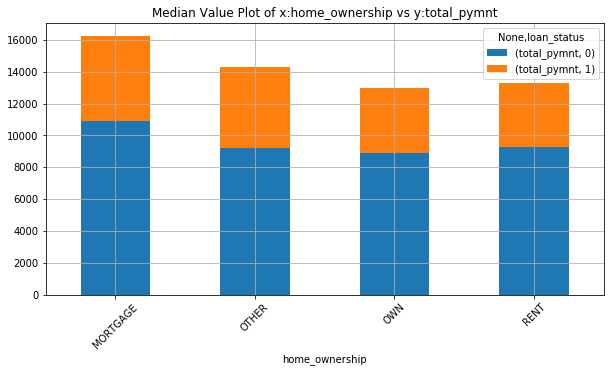

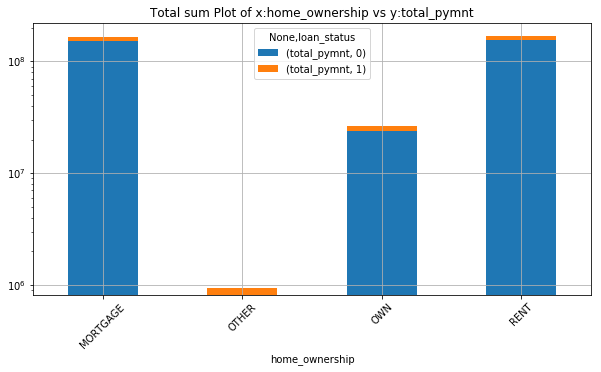

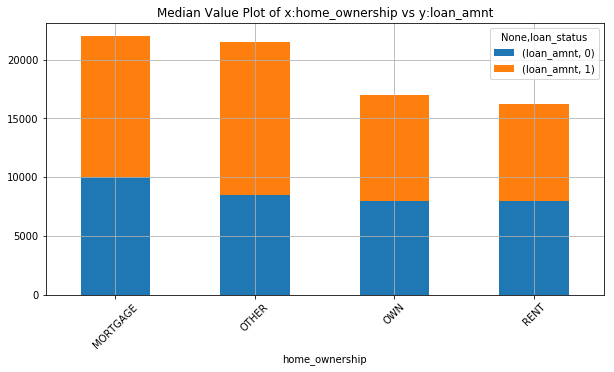

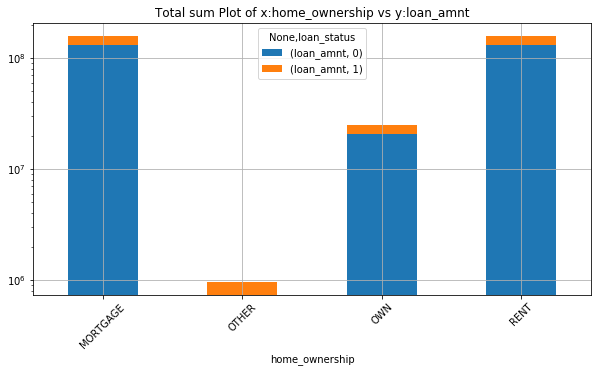

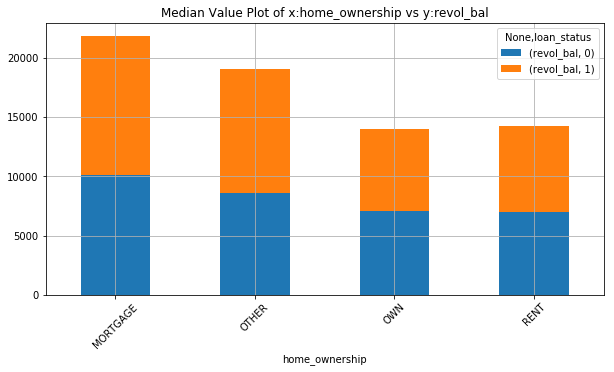

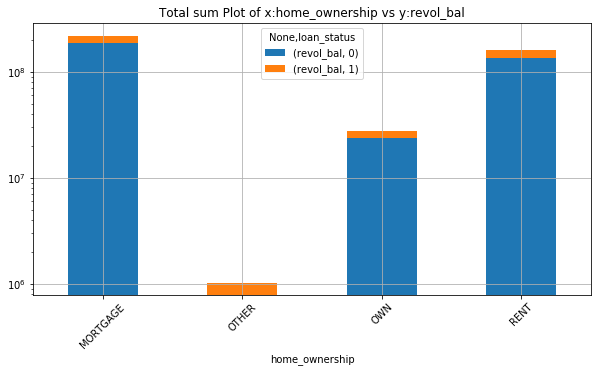

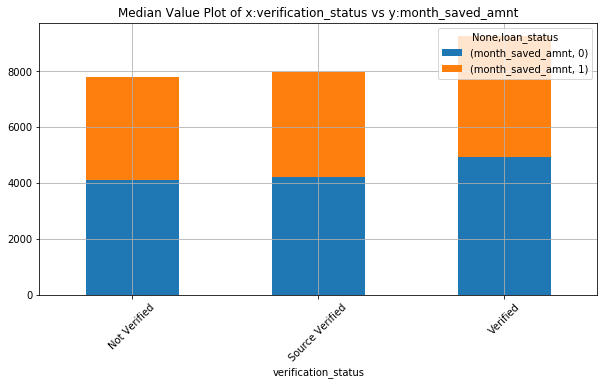

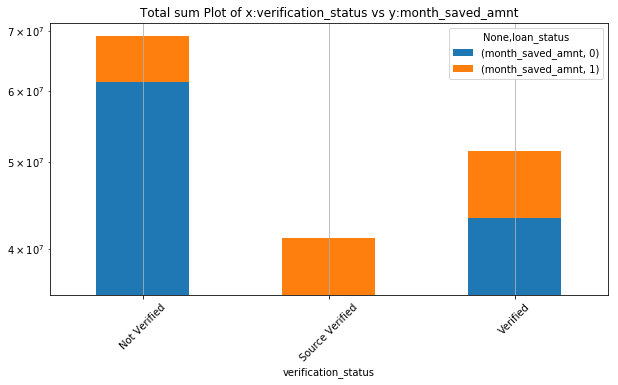

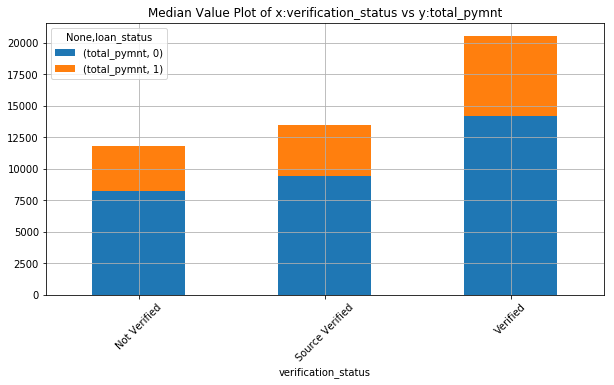

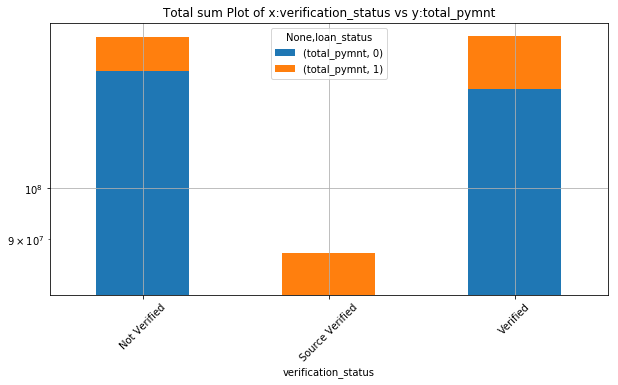

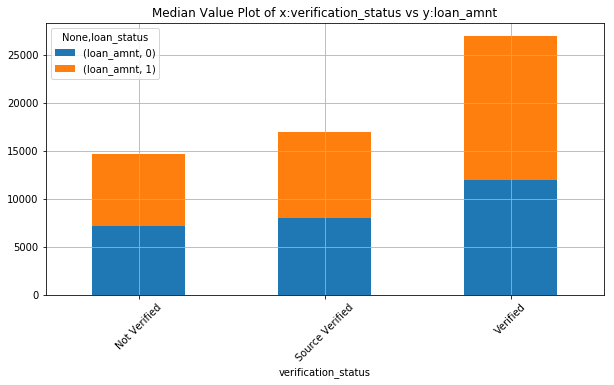

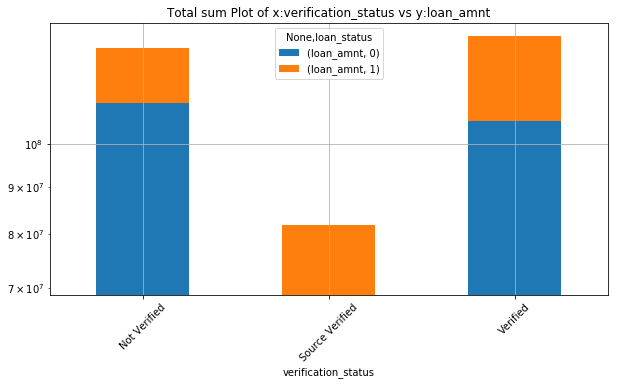

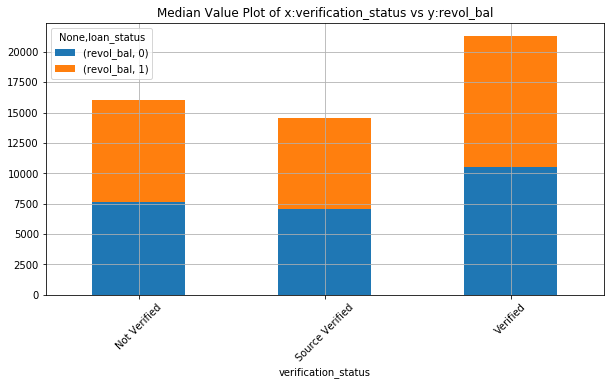

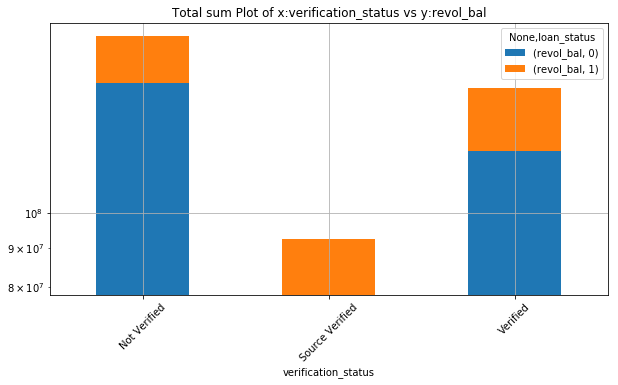

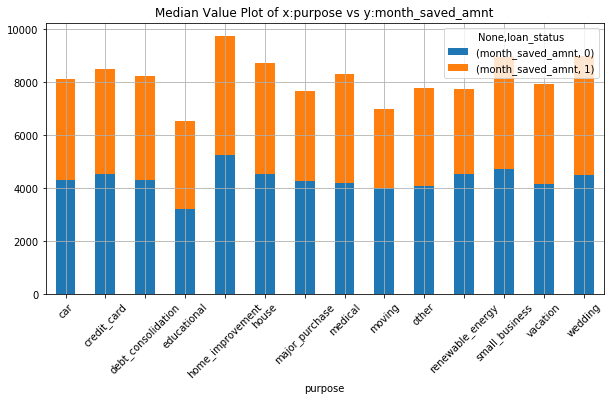

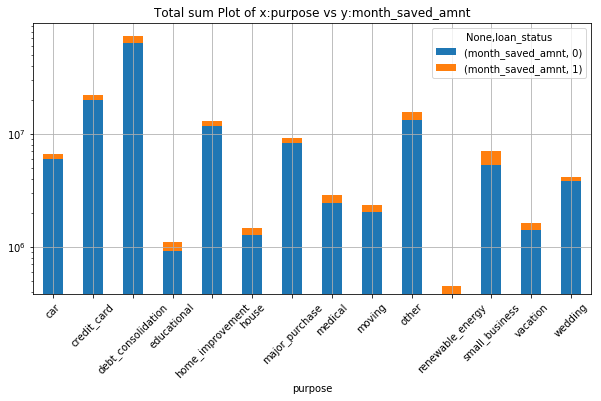

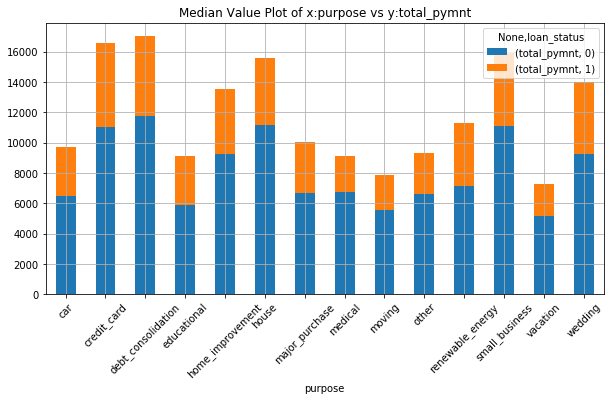

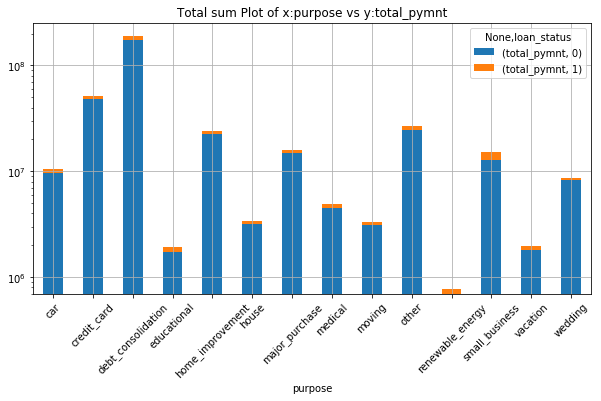

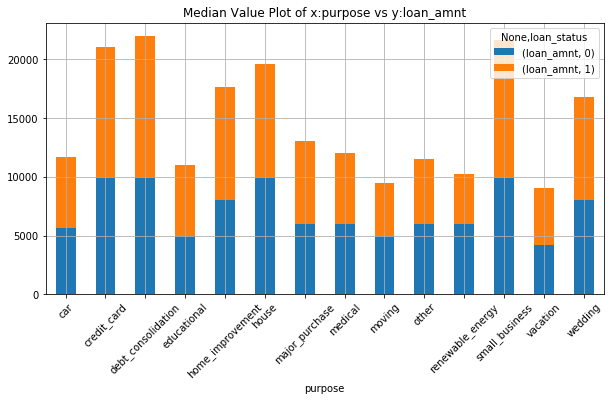

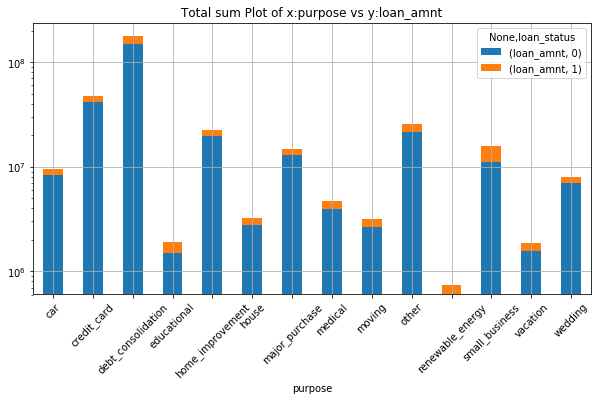

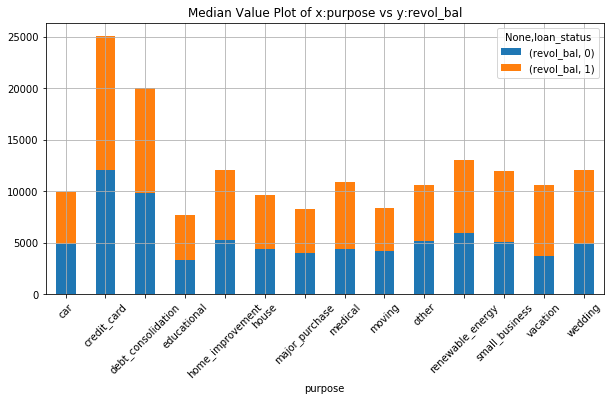

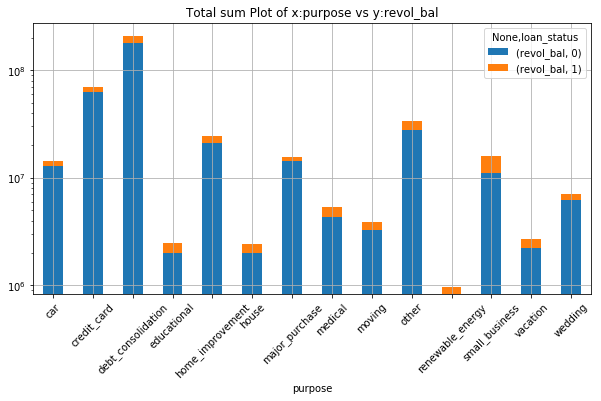

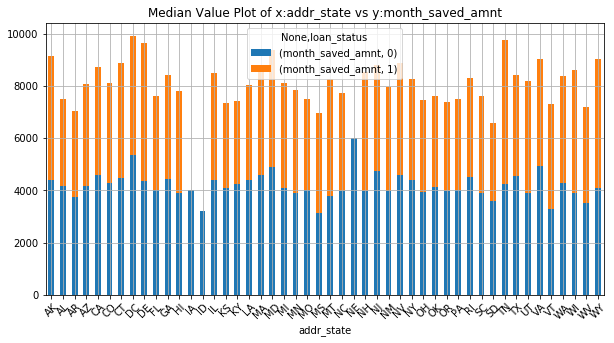

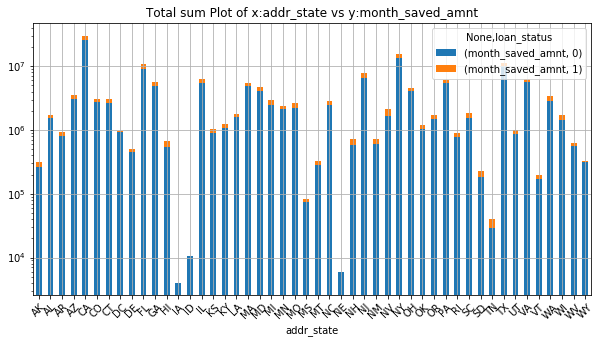

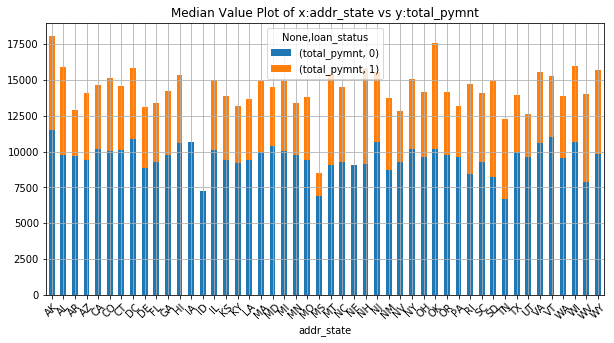

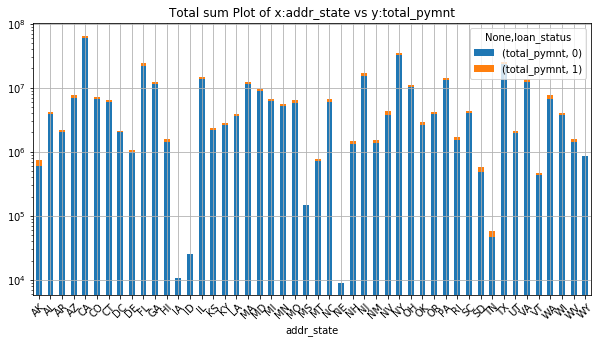

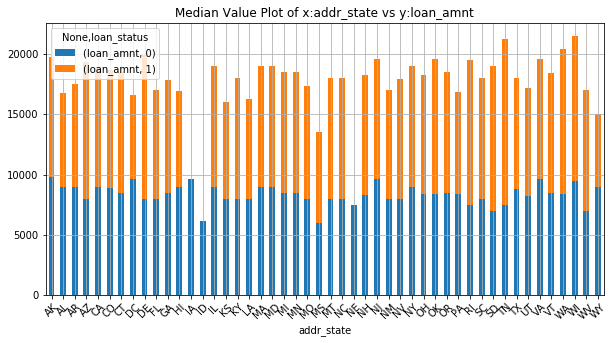

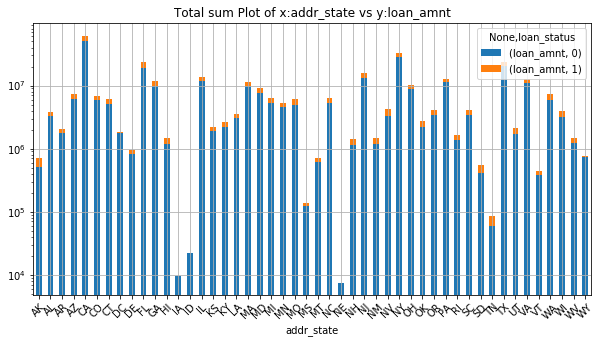

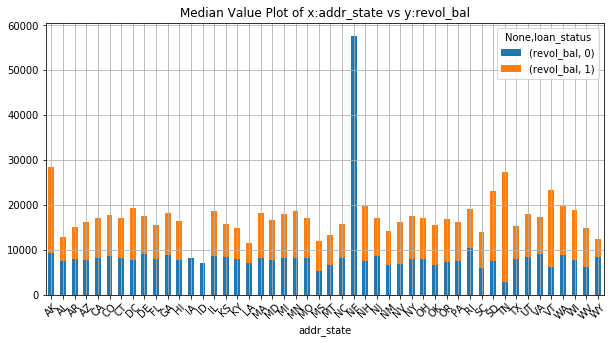

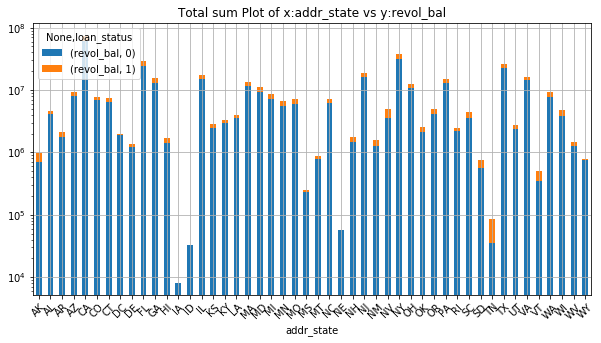

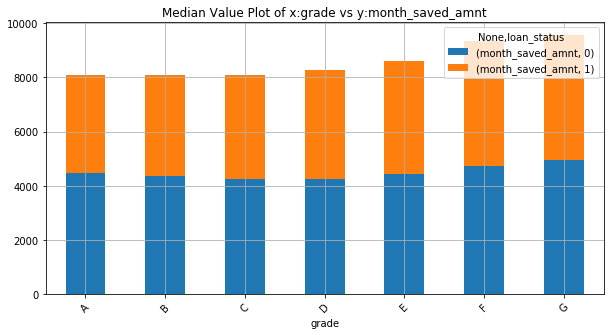

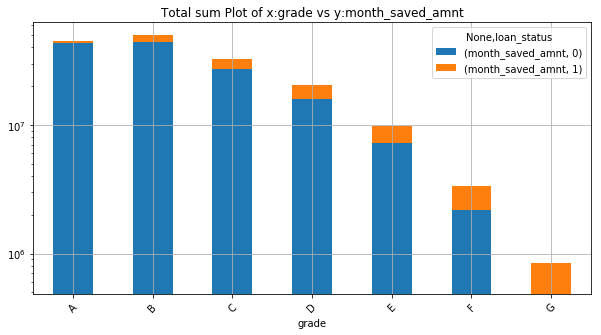

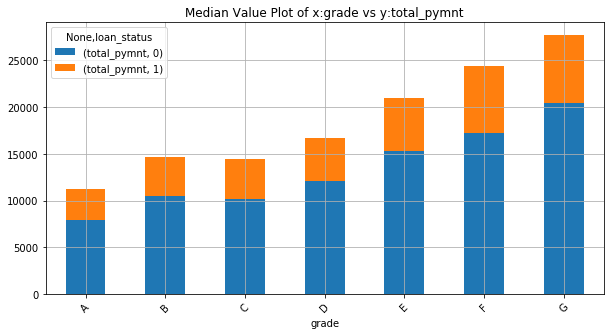

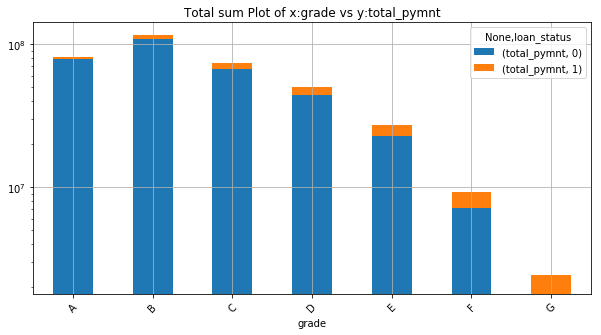

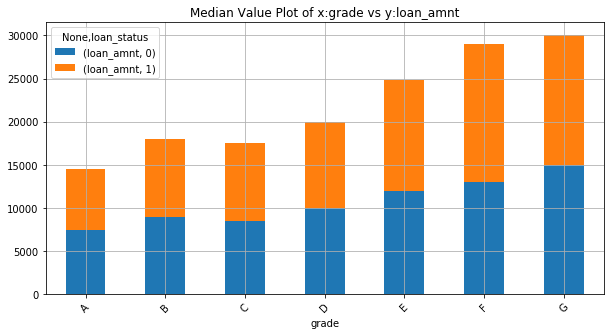

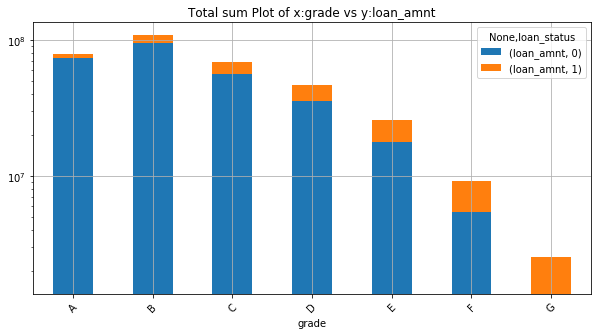

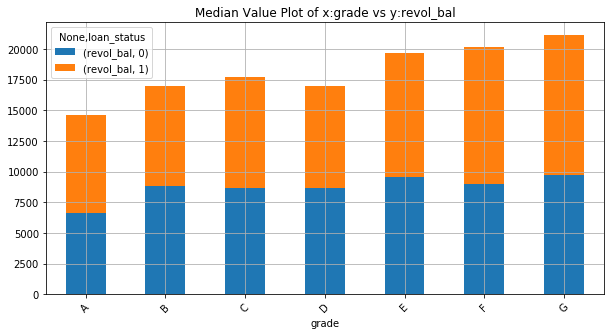

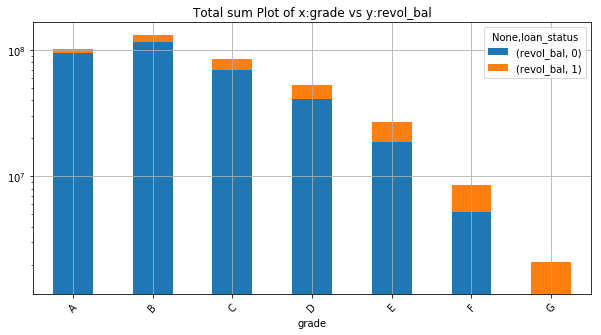

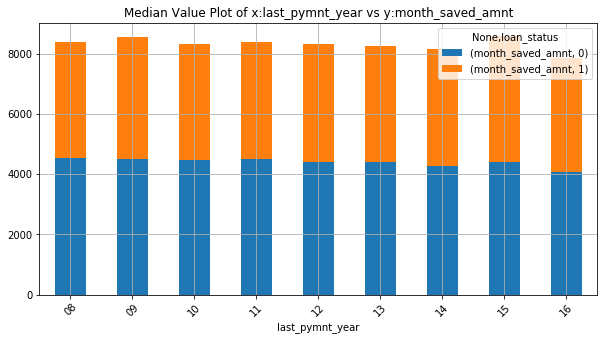

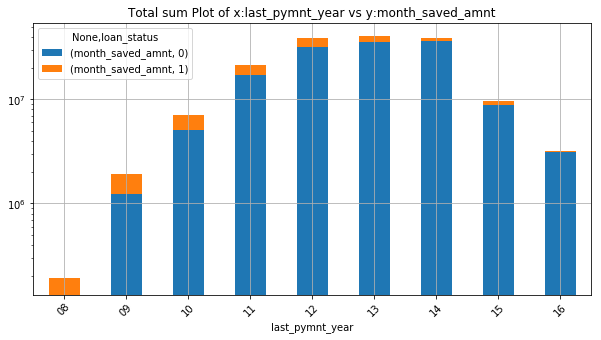

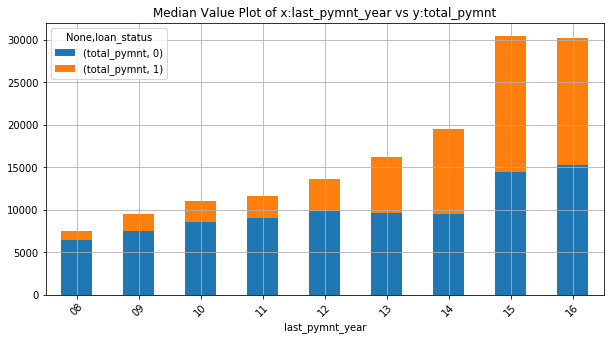

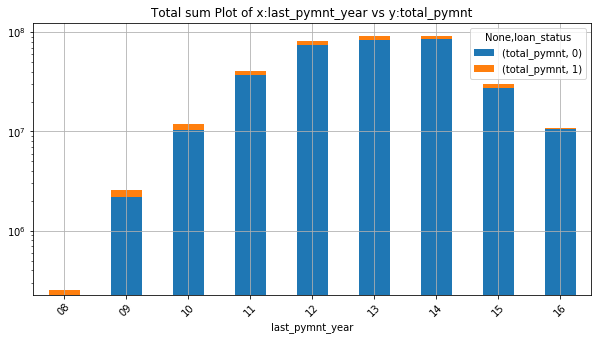

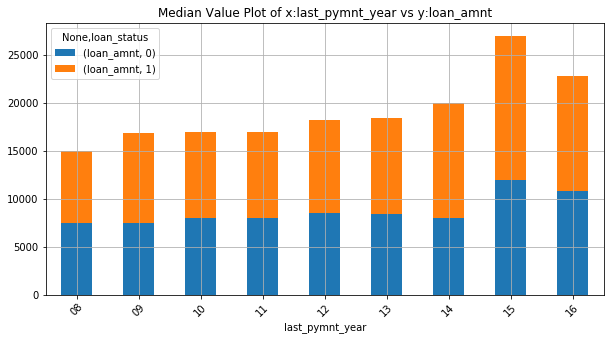

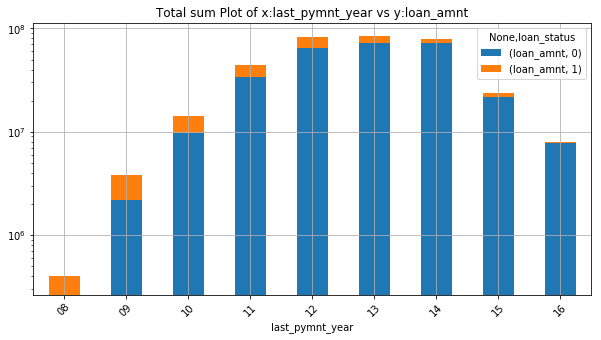

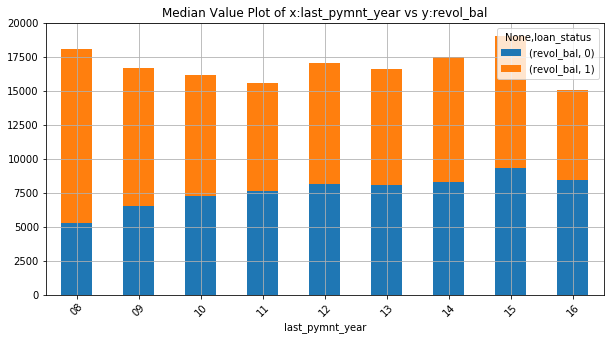

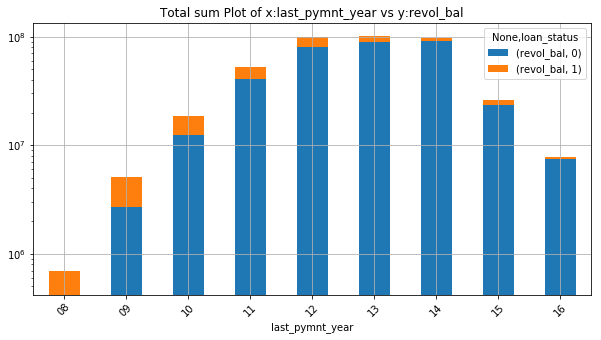

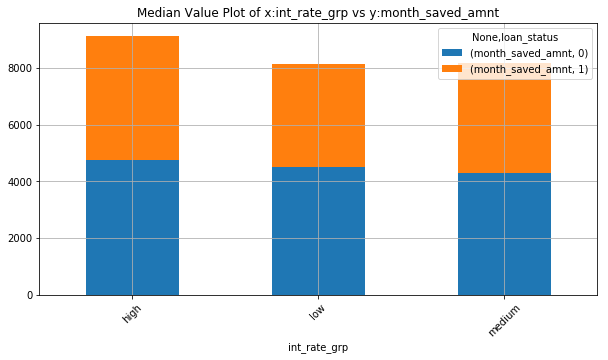

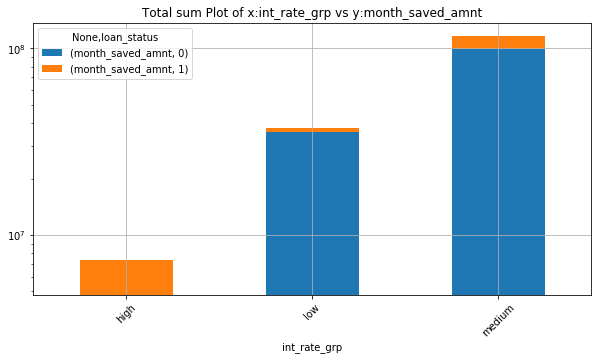

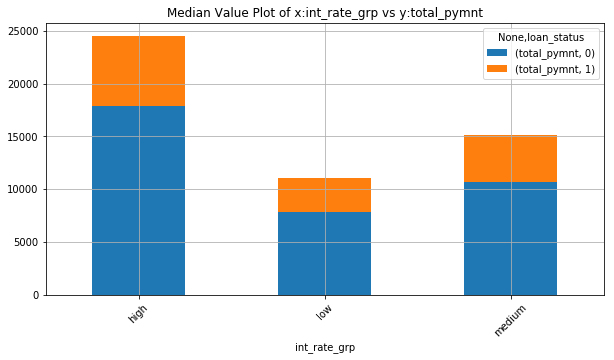

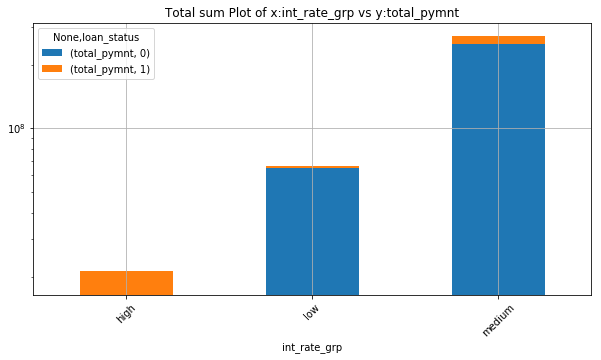

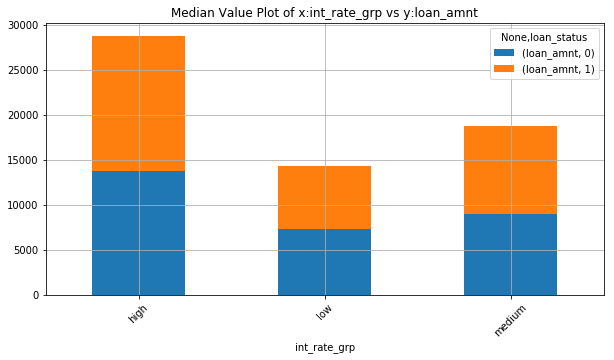

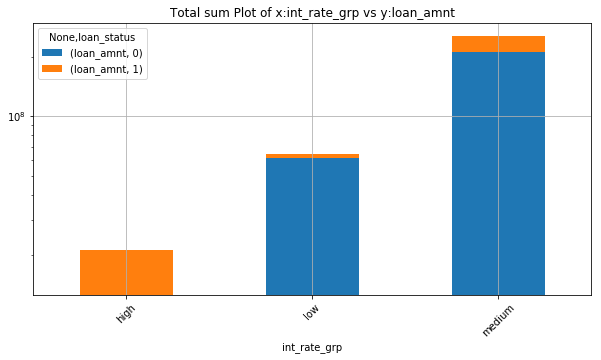

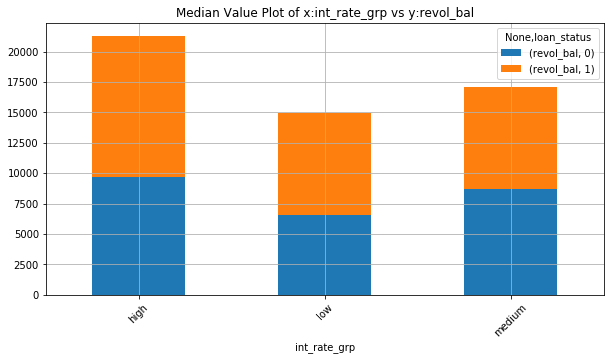

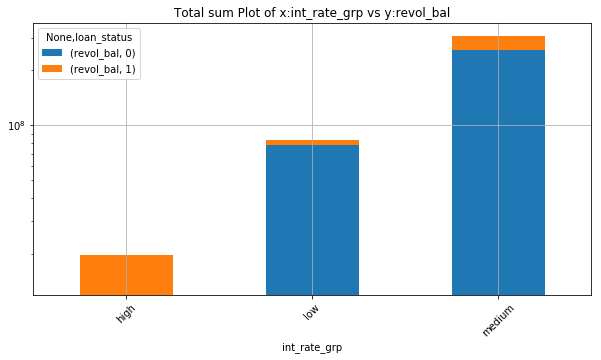

In [34]:
#comparing the home ownership and purpose (Bivariate analysis on categorical values)
# import itertools
charof_df = loan_data
ana_cat_cols = ['emp_length','home_ownership','verification_status','purpose','addr_state','grade','last_pymnt_year','int_rate_grp']
ana_can_cols = ['month_saved_amnt','total_pymnt','loan_amnt','revol_bal']

# for subset in itertools.combinations(cat_col_list_1, 2):
for cat_col in ana_cat_cols:
    for conti_col in ana_can_cols:

        ptab = pd.pivot_table(charof_df,index=[cat_col], values=[conti_col],columns=['loan_status'],aggfunc=np.median)
        ptab.plot(kind='bar',figsize=(10,5),stacked=True)
        plt.xticks(rotation=45)
        plt.title('Median Value Plot of x:{0} vs y:{1}'.format(cat_col,conti_col))
#         plt.yscale('log')
        plt.grid()
        
        ptab1 = pd.pivot_table(charof_df,index=[cat_col], values=[conti_col],columns=['loan_status'],aggfunc=np.sum)
        ptab1.plot(kind='bar',figsize=(10,5),stacked=True)
        plt.xticks(rotation=45)
        plt.title('Total sum Plot of x:{0} vs y:{1}'.format(cat_col,conti_col))
        plt.yscale('log')
        plt.grid()
        
        plt.show()



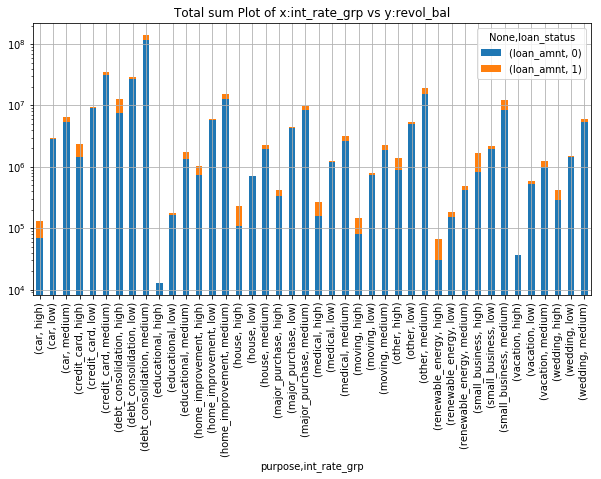

In [35]:
#Perform the co-relation and head map analysis of the continuous variable

ptab2 = pd.pivot_table(charof_df,index=['purpose','int_rate_grp'], values=['loan_amnt'],columns=['loan_status'],aggfunc=np.sum)
ptab2.plot(kind='bar',figsize=(10,5),stacked=True)
plt.xticks(rotation=90)
plt.title('Total sum Plot of x:{0} vs y:{1}'.format(cat_col,conti_col))
plt.yscale('log')
plt.grid()
plt.show()